In [ ]:
# REFERENCES:
# https://medium.com/botsbrasil/como-reconhecer-entidades-na-l%C3%ADngua-portuguesa-usando-spacy-8a5ca6f42c4f
# https://medium.com/@van3ssabandeira/o-famoso-spacy-90afb683b6fe
# https://towardsdatascience.com/clinical-named-entity-recognition-using-spacy-5ae9c002e86f
# https://www.machinelearningplus.com/spacy-tutorial-nlp/
# https://tede2.pucrs.br/tede2/bitstream/tede/9970/2/DANIEL%20ALESSANDRO%20GUIMAR%C3%83ES%20DE%20LOS%20REYES_DIS.pdf
# https://towardsdatascience.com/clinical-named-entity-recognition-using-spacy-5ae9c002e86f
# https://www.neuratec.com/blog/?p=285
# https://stackoverflow.com/questions/72772448/spacy-adding-multiple-patterns-to-a-single-ner-using-entity-ruler
# https://github.com/explosion/spaCy/issues/4042
#
# https://web.stanford.edu/%7Elaurik/publications/archive/questions.pdf
#
# https://stackoverflow.com/questions/67991549/how-to-extract-questions-from-text-using-spacy
# https://stackoverflow.com/questions/72819016/extract-information-from-a-text-using-spacy
# https://stackoverflow.com/questions/66671292/can-i-identify-question-wordswho-how-when-in-a-string-using-spacy
# https://www.analyticsvidhya.com/blog/2021/11/end-to-end-question-answering-system-using-nlp-and-squad-dataset/
# https://towardsdatascience.com/building-a-question-answering-system-part-1-9388aadff507
# https://medium.com/casl-project/building-a-question-answering-system-part-3-answer-extraction-5b9a4bd31e18
# https://medium.com/saarthi-ai/building-intelligent-question-answering-systems-with-elmo-1c703af385cc
#
# https://newscatcherapi.com/blog/how-to-annotate-entities-with-spacy-phrase-macher
# 

In [ ]:
#!pip uninstall spacy 

In [ ]:
# INSTALATIONS
#!pip install -U transformers==4.13.0
#!pip install -U spacy  # Successfully installed spacy-3.4.1
#!python -m spacy download pt
#!pip install scispacy
#!pip install git+https://github.com/explosion/spacy-transformers
#!pip install spacy[transformers]
#!pip install spacy-transformers

In [1]:
#import spacy

In [ ]:
#nlp = spacy.load("pt_core_news_sm")
#nlp = spacy.load("pt")
#import pt_core_news_sm
#nlp = pt_core_news_sm.load()

In [2]:
#nlp = spacy.load('pt_core_news_sm')

In [43]:
path = "/home/info/MyNotebooks/Datasets/SentencasTRT1/PDFsProcessing/txts/"

file = path+"01001949620195010225-DEJT-27-02-2020.pdf.txt"

arq = open(file, encoding = 'utf8')


In [419]:
import re

def get_campos(lines):
    
    
    pattern_reclamante = r"(RECLAMANTE:|Reclamante:).*(RECLAMADO:|Reclamado)"
    pattern_reclamado = r"(RECLAMADO:|Reclamado:).*(SENTENÇA|Sentença)|(RECLAMADO:|Reclamado:).*(RELATÓRIO|Relatório)"
    pattern_relatorio = r"(RELATÓRIO|Relatório).*(FUNDAMENTAÇÃO|Fundamentação)|(RELATÓRIO|Relatório).*(relatório)"
    pattern_fundamentacao = r"(FUNDAMENTAÇÃO|Fundamentação).*(DISPOSITIVO|Dispositivo)"
    pattern_dispositivo = r"(DISPOSITIVO|Dispositivo).*|(Isto posto,).*"
    pattern_vara = r"(REGIÃO).*(Vara do Trabalho)"
    pattern_processo = r"(PROCESSO:|Processo).*(CLASSE:|Classe)|(ATOrd).*(RECLAMANTE:|Reclamante)"
    
    try:
        reclamante = re.search(pattern_reclamante, lines).group(0).replace("RECLAMANTE:","").replace("RECLAMADO:","")
    except:
        try:
            pattern_reclamante = r"(Relatório ).*?(, |ajuizou)|(, ).*(, Reclamante)"
            reclamante = re.search(pattern_reclamante, lines).group(0).replace("Relatório ","").replace("ajuizou","").replace(", Reclamante","")
            reclamante = reclamante[reclamante.rfind(","):len(reclamante)].replace(",","")
        except:
            try:
                pattern_reclamante = r"(SENTENÇA|Sentença).*?(,)"
                reclamante = re.search(pattern_reclamante, lines).group(0).replace("SENTENÇA ","").replace("Sentença","").replace(",","")
            except:
                reclamante = ""
        
    try:
        reclamado = re.search(pattern_reclamado, lines).group(0).replace("RECLAMADO:","").replace("SENTENÇA","").replace("RELATÓRIO","")
    except:
        try:
            pattern_reclamado = r"(em face de ).*?(, )|(, e).*(, Reclamad)"
            reclamado = re.search(pattern_reclamado, lines).group(0).replace("em face de ","").replace(",","").replace("Reclamad","")
        except:
            reclamado = ""

    try:
        vara = re.search(pattern_vara, lines).group(0).replace("REGIÃO","").replace("Vara do Trabalho","")
    except:
        vara = ""

    try:
        processo = re.search(pattern_processo, lines).group(0).replace("PROCESSO:","").replace("CLASSE:","").replace("ATOrd","").replace("RECLAMANTE:","")
    except:
        processo = ""

    try:
        relatorio = re.search(pattern_relatorio, lines).group(0).replace("RELATÓRIO","").replace("FUNDAMENTAÇÃO","").replace("Relatório","").replace("Fundamentação","")
    except:
        try:
            pattern_relatorio = r"(ajuizou).*( relatório)"
            relatorio = re.search(pattern_relatorio, lines).group(0).replace("relatóri","")
        except:
            relatorio = ""

    try:
        fundamentacao = re.search(pattern_fundamentacao, lines).group(0).replace("DISPOSITIVO","").replace("FUNDAMENTAÇÃO","").replace("Dispositivo","").replace("Fundamentação","")
    except:
        # Fundamentacao = Relatorio:Dispositivo - Relatorio - Dispositivo
        try:
            pattern_fundamentacao = r"(RELATÓRIO).*(DISPOSITIVO)|(DECIDO|Decido).*(Isto posto,)"
            fundamentacao = re.search(pattern_fundamentacao, lines).group(0).replace(relatorio,"").replace("RELATÓRIO","").replace("DISPOSITIVO","").replace("Relatório","").replace("Dispositivo","").replace("DECIDO","").replace("Decido","")
        except:
            fundamentacao = ""
        
        # Relatorio:Dispositivo.replace(Relatorio,"")
        # Relatorio:Dispositivo.replace("DISPOSITIVO","")

    try:
        dispositivo = re.search(pattern_dispositivo, lines).group(0).replace("DISPOSITIVO","").replace("Dispositivo","")
        juiz  = dispositivo[dispositivo.rfind("."):len(dispositivo)].replace(".","")

    except:
        dispositivo = ""
        juiz = ""

        
    return (reclamante, reclamado, processo, vara, juiz, relatorio, fundamentacao, dispositivo)



def extraiDispositivo(pattern, text):
    padrao = pattern

    texto_inicio = 0
    texto_fim    = 0

    for match in re.finditer(pattern, text.lower()):
        index = match.start()  
        value = match.group()
        print(index, value) # match only one? parece que esta encontrando outras correspondencias também.

        #span = (self.tam_tokeniz - len(padrao))/2
        #span = (len(text) - len(padrao))/2
        span = len(text) #/4 # - len(padrao))/2
        texto_inicio = int(match.start() - span)
        texto_fim    = int(match.start() + len(padrao) + span)
        if(texto_fim > len(text)): # nao pode ser maior que o tamanho da string
            texto_fim = len(text)

    return(text[texto_inicio:texto_fim])



def get_class(texto):     

    padraoImproc   = "improcedentes|improcedente"
    padraoParcProc = "procedentes em parte|procedente em parte|parcialmente procedentes|parcialmente procedente|parcialmente improcedentes|parcialmente improcedente"
    padraoProc     = "procedentes|procedente"
    padraoAcordo   = "acordo|Acordo"


    t_par    = ""
    t_imp    = ""
    t_proc   = ""
    t_outros = ""
    classificacao = ""

    # parece que esta encontrando outras correspondencias também.
    t_par    = extraiDispositivo(padraoParcProc, texto)


    if len(t_par) != 0:
        dispositivo   = t_par
        classificacao = "Parcialmente procedente"
        #break
    else: 
        t_imp    = extraiDispositivo(padraoImproc, texto)
        if len(t_imp) != 0:
            dispositivo   = t_imp
            classificacao = "Improcedente"
            #break
        else: 
            t_proc   = extraiDispositivo(padraoProc, texto)
            if len(t_proc) != 0:
                dispositivo   = t_proc
                classificacao = "Procedente"
                #break
            else:
                t_outros = extraiDispositivo(padraoAcordo, texto)
                if len(t_outros) != 0:
                    dispositivo   = t_outros
                    classificacao = "Acordo ou outros"
                else:
                    classificacao = "Nenhuma"
                    #dispositivo   = texto[tam_tokeniz:-1]
                # Coloca outro if aninhando e por fim, no else residual, colocar uma flag ("none"?).
                # Posteriormente, filtrar no dataset classificado aqueles com a flag que nao puderam
                #  receber nenhuma das classificacoes anteriores e exclui-los do dataset anotado.

    return(classificacao)


In [421]:
%%time
import os
import pandas as pd

directoryList = os.listdir(path)
'''
directoryList = []
# Funciona:
directoryList.append("01010991020205010341-DEJT-05-01-2022.pdf.txt")
directoryList.append("00124718620155010481-DOERJ-07-06-2017.pdf.txt")
directoryList.append("00116975620155010481-10-07-2016.pdf.txt")
directoryList.append("01017989320175010021-DOERJ-17-05-2018.pdf.txt")
directoryList.append("01006796620205010062-DEJT-27-10-2020.pdf.txt")
directoryList.append("01024495220175010401-DEJT-20-08-2021.pdf.txt")
directoryList.append("01002601020185010032-DEJT-14-04-2018.pdf.txt")
#
# Nao funciona:
directoryList.append("00111906420145010050-08-10-2015.pdf.txt") # ATA DE AUDIÊNCIA. Vale a pena descarta-la!
directoryList.append("01003898420185010009-DEJT-15-05-2018.pdf.txt") # Documento pequeno
directoryList.append("01006042520185010053-DEJT-12-12-2018.pdf.txt") # Dificil de entender. Sem estrutura
#
#directoryList.append("")
'''

sentenca   = []
reclamante = []
reclamado  = []
vara       = []
processo   = []
juiz       = []
relatorio  = []
fundamentacao = []
dispositivo   = []
classificacao = []

for i in range(0,len(directoryList)):
    if directoryList[i].endswith(".txt"): 
        print('i: ',i,"file: ",directoryList[i])
        with open(path+directoryList[i], encoding = 'utf8') as f:
            text = f.readlines()
            text = "".join(text)
            text = text.replace("\n", " ")
            sentenca.append(text)
            recl_te, recl_do, process_, vara_, juiz_, relat_, fundam_, dispos_ = get_campos(text)
            if(process_ == ""):
                process_ = os.path.splitext(os.path.splitext(directoryList[i])[0])[0]
            classif_ = get_class(dispos_)
            classificacao.append(classif_)

        f.close()

        reclamante.append(recl_te)
        reclamado.append(recl_do)
        vara.append(vara_)
        processo.append(process_)
        juiz.append(juiz_)
        relatorio.append(relat_)
        fundamentacao.append(fundam_)
        dispositivo.append(dispos_)
        #classificacao.append("")
    
    
dados = list(zip(sentenca, reclamante, reclamado,processo, vara, juiz, relatorio, fundamentacao, dispositivo, classificacao))
#print(len(dados))

# Cria os arquivos na pasta (...)/SentencasTRT1/DsClassAnot
df = pd.DataFrame(dados, columns=['sentenca','reclamante','reclamado','processo','vara','juiz','relatorio','fundamentacao','dispositivo','classificacao'])



#dsFromTXTs = Dataset.from_pandas(df)
#dsFromTXTs.save_to_disk("/home/info/MyNotebooks/Datasets/SentencasTRT1/Dataset/")



i:  0 file:  01015581720165010223-DOERJ-29-05-2017.pdf.txt
i:  1 file:  01010991020205010341-DEJT-05-01-2022.pdf.txt
1985 parcialmente procedentes
3659 parcialmente procedentes
i:  2 file:  01005402820175010060-DEJT-13-08-2018.pdf.txt
170 procedentes
i:  3 file:  01009422920215010203-DEJT-04-05-2022.pdf.txt
i:  4 file:  01010723720175010501-DEJT-05-09-2017.pdf.txt
329 procedente em parte
i:  5 file:  01018633220165010245-DEJT-11-12-2017.pdf.txt
12433 procedente em parte
i:  6 file:  01000621820205010059-DEJT-28-06-2021.pdf.txt
i:  7 file:  01006328520175010066-DOERJ-25-04-2018.pdf.txt
222 improcedentes
i:  8 file:  01008667520205010482-DEJT-13-02-2021.pdf.txt
84 procedentes em parte
i:  9 file:  01003645620165010069-DEJT-16-02-2022.pdf.txt
i:  10 file:  01013443720175010014-DEJT-03-02-2021.pdf.txt
78 procedentes
i:  11 file:  00115601120155010017-DEJT-11-07-2017.pdf.txt
115 procedentes em parte
i:  12 file:  01007723320165010203-DEJT-26-05-2017.pdf.txt
234 procedente em parte
i:  13 fi

20 procedentes em parte
i:  145 file:  01002129820175010060-DEJT-08-08-2017.pdf.txt
2393 procedentes em parte
i:  146 file:  01007578520175010023-DEJT-19-03-2018.pdf.txt
183 parcialmente procedentes
i:  147 file:  01001114420195010043-DEJT-12-06-2021.pdf.txt
5348 parcialmente procedente
i:  148 file:  01019795420175010002-DEJT-10-05-2019.pdf.txt
402 procedentes em parte
i:  149 file:  01003741820195010030-DEJT-27-01-2020.pdf.txt
2806 procedente
4397 procedentes
i:  150 file:  01003185920195010070-DEJT-14-10-2019.pdf.txt
i:  151 file:  01001129520175010076-DEJT-14-06-2021.pdf.txt
20 parcialmente procedentes
i:  152 file:  01005259720175010015-DEJT-10-10-2017.pdf.txt
i:  153 file:  01004626220185010201-DEJT-13-09-2018.pdf.txt
68 procedentes
i:  154 file:  01001951620185010452-DEJT-26-04-2019.pdf.txt
148 procedente em parte
i:  155 file:  01015192920175010241-DEJT-09-06-2018.pdf.txt
34 parcialmente procedentes
i:  156 file:  01025733820175010206-DEJT-09-10-2019.pdf.txt
126 procedente em p

218 parcialmente procedentes
i:  252 file:  01012569620195010541-DEJT-10-03-2021.pdf.txt
77 parcialmente procedente
i:  253 file:  01014624420165010015-DOERJ-09-06-2017.pdf.txt
i:  254 file:  00068330620145010482-12-04-2016.pdf.txt
328 parcialmente procedentes
i:  255 file:  01001529820205010035-DEJT-13-12-2021.pdf.txt
143 improcedentes
i:  256 file:  01011186820185010023-DEJT-06-09-2021.pdf.txt
104 procedentes em parte
i:  257 file:  01002066720185010283-DEJT-20-07-2018.pdf.txt
i:  258 file:  01005868020215010511-DEJT-12-04-2022.pdf.txt
23 procedente
i:  259 file:  01000800720215010511-DEJT-05-04-2021.pdf.txt
20 procedentes
i:  260 file:  01006971820195010452-DEJT-17-02-2020.pdf.txt
64 procedentes
i:  261 file:  01000863820215010018-DEJT-18-03-2021.pdf.txt
20 improcedentes
i:  262 file:  01003061820205010003-DEJT-02-09-2021.pdf.txt
66 procedente em parte
i:  263 file:  01004832820185010075-DEJT-06-11-2018.pdf.txt
138 procedentes em parte
i:  264 file:  01001939520175010059-DEJT-29-08-

20 procedentes em parte
i:  370 file:  01011466120165010005-DEJT-09-04-2017.pdf.txt
i:  371 file:  01006687220185010073-DEJT-02-09-2020.pdf.txt
34 improcedentes
103 improcedente
i:  372 file:  01013546820185010201-DEJT-05-06-2019.pdf.txt
75 procedentes em parte
i:  373 file:  01005374720185010025-DEJT-07-01-2019.pdf.txt
6377 improcedente
i:  374 file:  01012194220175010023-DEJT-02-04-2020.pdf.txt
22 procedente em parte
i:  375 file:  01006863320175010072-DEJT-20-11-2017.pdf.txt
31265 parcialmente procedentes
i:  376 file:  01009379820165010003-DEJT-24-01-2018.pdf.txt
140 procedente em parte
i:  377 file:  01001656120175010081-DEJT-27-09-2017.pdf.txt
i:  378 file:  01005524620215010078-DEJT-22-11-2021.pdf.txt
635 improcedentes
i:  379 file:  01003322620205010226-DEJT-11-01-2021.pdf.txt
i:  380 file:  01016742320165010223-DEJT-10-10-2019.pdf.txt
i:  381 file:  01020151720175010481-DEJT-24-05-2019.pdf.txt
133 procedentes em parte
i:  382 file:  01010770920185010571-DEJT-15-03-2019.pdf.txt

4913 procedentes em parte
i:  495 file:  01002450920185010075-DEJT-25-07-2018.pdf.txt
i:  496 file:  00116181620145010060-DEJT-24-10-2017.pdf.txt
176 procedentes
i:  497 file:  01015527220165010461-DEJT-17-03-2017.pdf.txt
410 parcialmente procedentes
i:  498 file:  01004605520195010202-DEJT-03-12-2019.pdf.txt
i:  499 file:  01011108820165010079-DEJT-29-11-2017.pdf.txt
6935 procedentes em parte
i:  500 file:  00109717320155010581-23-12-2015.pdf.txt
218 parcialmente procedente
i:  501 file:  01002803220195010075-DEJT-02-09-2019.pdf.txt
131 procedentes
i:  502 file:  01003009420185010483-DEJT-30-07-2018.pdf.txt
i:  503 file:  01001765420175010481-DOERJ-07-09-2017.pdf.txt
306 parcialmente procedente
i:  504 file:  01003907720165010029-DEJT-29-06-2017.pdf.txt
i:  505 file:  01003403720195010226-DEJT-10-06-2021.pdf.txt
100 procedente em parte
3436 parcialmente procedente
i:  506 file:  01012899520175010205-DEJT-01-12-2017.pdf.txt
83 procedentes em parte
i:  507 file:  01001436820175010512-DE

349 procedentes em parte
i:  601 file:  01000521020175010081-DOERJ-11-08-2017.pdf.txt
23 procedente em parte
i:  602 file:  01000862420165010241-DEJT-20-09-2017.pdf.txt
659 procedentes em parte
i:  603 file:  00109819720145010017-DEJT-15-02-2017.pdf.txt
i:  604 file:  01008355520165010204-DOERJ-14-12-2016.pdf.txt
314 procedentes em parte
i:  605 file:  01006799620205010052-DEJT-06-06-2021.pdf.txt
2 procedente em parte
i:  606 file:  01005464420215010432-DEJT-03-09-2021.pdf.txt
31 improcedentes
i:  607 file:  00123825720155010483-DEJT-09-04-2019.pdf.txt
i:  608 file:  01017755420175010246-DEJT-17-01-2019.pdf.txt
138 procedentes em parte
i:  609 file:  01014097220175010033-DEJT-23-01-2019.pdf.txt
25 procedente em parte
i:  610 file:  01016012220185010501-DEJT-13-12-2018.pdf.txt
460 procedente em parte
i:  611 file:  00129758520155010451-19-10-2016.pdf.txt
191 procedentes em parte
i:  612 file:  01004199220165010461-DOERJ-04-07-2017.pdf.txt
293 parcialmente procedentes
i:  613 file:  0010

38 procedentes em parte
i:  732 file:  01020827620175010482-DEJT-15-08-2019.pdf.txt
215 procedente
i:  733 file:  01004650320185010044-DEJT-22-03-2019.pdf.txt
13550 procedentes
i:  734 file:  01008300820175010007-DEJT-18-03-2018.pdf.txt
20444 parcialmente procedentes
i:  735 file:  01011579320185010531-DEJT-25-10-2018.pdf.txt
213 procedentes
i:  736 file:  01008768620175010042-DEJT-15-05-2018.pdf.txt
28 procedente em parte
i:  737 file:  01013107420175010204-DOERJ-04-10-2017.pdf.txt
53 procedentes em parte
i:  738 file:  01014023720175010015-DEJT-05-12-2018.pdf.txt
i:  739 file:  01005747220205010003-DEJT-11-02-2022.pdf.txt
i:  740 file:  01017594320165010244-DOERJ-21-06-2017.pdf.txt
3564 procedente em parte
i:  741 file:  01014819320165010033-DOERJ-04-08-2017.pdf.txt
51 improcedentes
i:  742 file:  01005237920165010010-DOERJ-23-01-2018.pdf.txt
20 improcedente
i:  743 file:  01001435620215010018-DEJT-01-08-2021.pdf.txt
i:  744 file:  00107009320135010206-DEJT-28-06-2021.pdf.txt
19 impr

38 procedentes em parte
i:  845 file:  01003053620175010036-DEJT-26-10-2017.pdf.txt
122 improcedente
i:  846 file:  01001519720175010042-DEJT-24-01-2018.pdf.txt
22 procedente em parte
i:  847 file:  01006905420215010226-DEJT-18-02-2022.pdf.txt
167 procedentes em parte
i:  848 file:  01015523020175010302-DEJT-21-06-2018.pdf.txt
67 procedentes
i:  849 file:  0226700-19.1996.5.01.0001.pdf.txt
214 procedente em parte
i:  850 file:  00101284920135010203-DEJT-22-02-2017.pdf.txt
24 procedentes em parte
i:  851 file:  01006196220175010462-DEJT-31-08-2020.pdf.txt
i:  852 file:  01006939220195010512-DEJT-05-09-2019.pdf.txt
51 procedentes em parte
i:  853 file:  01008615220165010075-DOERJ-17-11-2016.pdf.txt
i:  854 file:  01008347620185010244-DEJT-16-09-2019.pdf.txt
i:  855 file:  01017357520175010245-DOERJ-09-05-2018.pdf.txt
i:  856 file:  01009921420175010262-DEJT-09-02-2018.pdf.txt
250 parcialmente procedentes
1875 parcialmente procedentes
i:  857 file:  01003686420185010541-DEJT-15-05-2019.pd

761 parcialmente procedente
i:  952 file:  01009153520195010003-DEJT-16-11-2021.pdf.txt
489 procedente em parte
i:  953 file:  01006356020215010014-DEJT-27-10-2021.pdf.txt
89 improcedentes
i:  954 file:  01004504720175010245-DEJT-06-02-2018.pdf.txt
i:  955 file:  01001225220195010050-DEJT-27-01-2022.pdf.txt
66 improcedentes
i:  956 file:  01004962620175010022-DEJT-27-01-2018.pdf.txt
88 procedentes em parte
i:  957 file:  01010630220175010202-DEJT-02-12-2017.pdf.txt
i:  958 file:  01004609220185010007-DEJT-13-02-2019.pdf.txt
i:  959 file:  01005101520205010342-DEJT-26-06-2020.pdf.txt
i:  960 file:  01009722320195010401-DEJT-24-01-2020.pdf.txt
239 procedentes em parte
i:  961 file:  01011470620185010028-DEJT-30-03-2020.pdf.txt
63 procedentes
i:  962 file:  00121780320155010551-DEJT-30-03-2017.pdf.txt
28 parcialmente procedentes
i:  963 file:  00116755420155010042-DEJT-09-01-2019.pdf.txt
150 procedente em parte
i:  964 file:  01016897220165010261-DOERJ-18-10-2017.pdf.txt
58 procedente em 

3919 procedente em parte
i:  1065 file:  01010543520175010042-DOERJ-08-05-2018.pdf.txt
27 improcedente
i:  1066 file:  01005894820185010282-DEJT-03-10-2018.pdf.txt
166 procedentes em parte
i:  1067 file:  01009552020205010023-DEJT-07-07-2021.pdf.txt
28 procedente
i:  1068 file:  01010283920195010245-DEJT-07-04-2020.pdf.txt
i:  1069 file:  01003661620205010221-DEJT-14-04-2021.pdf.txt
30 parcialmente procedentes
i:  1070 file:  01004938420175010244-DEJT-09-08-2018.pdf.txt
i:  1071 file:  01009729820175010043-DEJT-14-10-2017.pdf.txt
72 procedente em parte
i:  1072 file:  01001773920175010481-DEJT-20-10-2017.pdf.txt
461 parcialmente procedente
i:  1073 file:  01007935520205010207-DEJT-20-05-2021.pdf.txt
76 procedentes em parte
386 parcialmente procedente
i:  1074 file:  01014423520175010042-DEJT-07-06-2018.pdf.txt
i:  1075 file:  01022373720175010205-DEJT-23-06-2018.pdf.txt
32 procedentes em parte
i:  1076 file:  01003306520205010223-DEJT-12-03-2021.pdf.txt
i:  1077 file:  0101156482020501

21 procedente em parte
2357 procedente em parte
i:  1173 file:  01003356620205010521-DEJT-17-11-2021.pdf.txt
126 parcialmente procedente
i:  1174 file:  01008874520175010227-DEJT-22-07-2018.pdf.txt
24 procedentes em parte
i:  1175 file:  01011665220175010511-DOERJ-09-03-2018.pdf.txt
104 procedente em parte
i:  1176 file:  00114321120145010054-DEJT-21-05-2021.pdf.txt
i:  1177 file:  01005183220205010070-DEJT-09-03-2021.pdf.txt
33 parcialmente procedentes
i:  1178 file:  00105715820155010064-DEJT-21-07-2017.pdf.txt
i:  1179 file:  00110058620155010245-DEJT-25-04-2018.pdf.txt
i:  1180 file:  01020223820175010051-DEJT-26-07-2018.pdf.txt
25 procedente em parte
i:  1181 file:  01003069320185010033-DEJT-11-07-2018.pdf.txt
i:  1182 file:  01010780520185010050-DEJT-21-10-2019.pdf.txt
10927 parcialmente procedentes
i:  1183 file:  01014397620165010281-DEJT-05-02-2017.pdf.txt
268 procedente
i:  1184 file:  01005126920205010411-DEJT-16-10-2020.pdf.txt
i:  1185 file:  01001369820215010039-DEJT-13-0

i:  1281 file:  01006075020195010471-DEJT-02-10-2019.pdf.txt
38 procedentes em parte
i:  1282 file:  01005213420215010043-DEJT-28-03-2022.pdf.txt
71 procedentes em parte
i:  1283 file:  01002079220195010226-DEJT-28-06-2019.pdf.txt
337 procedente em parte
i:  1284 file:  01019541420165010281-DEJT-27-09-2017.pdf.txt
178 procedentes
i:  1285 file:  01001048520185010205-DEJT-22-09-2018.pdf.txt
32 procedentes em parte
i:  1286 file:  01009624820185010551-DEJT-29-07-2019.pdf.txt
804 procedentes
i:  1287 file:  01006365320185010401-DEJT-30-11-2018.pdf.txt
606 procedente em parte
i:  1288 file:  00115289420155010020-24-08-2016.pdf.txt
39 procedentes em parte
i:  1289 file:  01013218720195010025-DEJT-24-08-2021.pdf.txt
20 procedente em parte
i:  1290 file:  01000605320205010025-DEJT-04-11-2020.pdf.txt
134 procedentes
i:  1291 file:  01009005820205010059-DEJT-10-05-2021.pdf.txt
i:  1292 file:  01001342320195010226-DEJT-28-05-2019.pdf.txt
142 procedente em parte
i:  1293 file:  010160472201750102

16162 improcedentes
16348 improcedente
16609 improcedente
16997 improcedente
17741 improcedentes
i:  1388 file:  01000394320205010004-DEJT-06-09-2021.pdf.txt
387 parcialmente procedente
i:  1389 file:  01001579220215010227-DEJT-14-09-2021.pdf.txt
28598 procedentes
i:  1390 file:  00100928020155010059-30-03-2016.pdf.txt
224 parcialmente procedentes
i:  1391 file:  01012109120185010202-DEJT-27-06-2019.pdf.txt
608 parcialmente procedentes
i:  1392 file:  01001740520165010551-DEJT-03-07-2017.pdf.txt
458 parcialmente procedente
i:  1393 file:  01018318320175010021-DEJT-28-04-2018.pdf.txt
193 parcialmente procedentes
i:  1394 file:  01013646820195010075-DEJT-24-08-2020.pdf.txt
89 procedentes
i:  1395 file:  01012073820195010482-DEJT-17-02-2020.pdf.txt
30 improcedente
i:  1396 file:  01006311720185010341-DEJT-17-01-2019.pdf.txt
1752 procedentes
i:  1397 file:  01000152420215010022-DEJT-12-07-2021.pdf.txt
i:  1398 file:  01006052820175010511-DEJT-04-02-2020.pdf.txt
2289 improcedentes
i:  1399 

i:  1530 file:  01009981620165010081-DEJT-18-02-2017.pdf.txt
237 procedente em parte
i:  1531 file:  01012154020165010055-DEJT-28-08-2017.pdf.txt
49 procedentes em parte
i:  1532 file:  01011303620195010221-DEJT-09-09-2021.pdf.txt
130 parcialmente procedentes
i:  1533 file:  01013533720175010551-DEJT-06-02-2018.pdf.txt
i:  1534 file:  01012815120195010043-DEJT-10-09-2021.pdf.txt
73 procedente em parte
i:  1535 file:  01000526920175010223-DEJT-05-09-2019.pdf.txt
81 improcedentes
i:  1536 file:  01014553320175010204-DEJT-20-10-2017.pdf.txt
53 procedentes em parte
i:  1537 file:  01015461620165010057-DOERJ-07-02-2017.pdf.txt
115 improcedentes
i:  1538 file:  01000056220195010082-DEJT-21-10-2019.pdf.txt
i:  1539 file:  01006741620165010246-DEJT-03-07-2017.pdf.txt
29 parcialmente procedentes
i:  1540 file:  01010715220175010501-DEJT-05-09-2017.pdf.txt
329 procedente em parte
i:  1541 file:  01009336820165010227-DEJT-12-02-2017.pdf.txt
121 procedente em parte
i:  1542 file:  0100453142020501

224 procedentes em parte
i:  1657 file:  01010578820195010019-DEJT-14-02-2020.pdf.txt
344 procedente
i:  1658 file:  01000165420215010007-DEJT-30-06-2021.pdf.txt
20 procedentes em parte
i:  1659 file:  00117772020155010481-DOERJ-12-12-2016.pdf.txt
38674 parcialmente procedente
i:  1660 file:  01008444120195010065-DEJT-11-01-2022.pdf.txt
349 parcialmente procedentes
i:  1661 file:  01008986620195010401-DEJT-29-01-2020.pdf.txt
245 procedentes em parte
i:  1662 file:  01003452120175010035-DEJT-03-07-2018.pdf.txt
4943 parcialmente procedente
19681 parcialmente procedentes
i:  1663 file:  01017691820175010482-DEJT-25-02-2019.pdf.txt
65 procedente em parte
i:  1664 file:  00109914120155010039-03-01-2016.pdf.txt
i:  1665 file:  00107783820145010017-26-02-2016.pdf.txt
i:  1666 file:  00116718820145010062-DEJT-22-02-2018.pdf.txt
35005 procedentes em parte
i:  1667 file:  01007239420175010481-DEJT-20-10-2017.pdf.txt
291 procedentes
i:  1668 file:  01015244920175010080-DEJT-12-06-2018.pdf.txt
18 

114 procedentes
i:  1781 file:  01007628920175010223-DEJT-20-11-2018.pdf.txt
118 procedentes em parte
i:  1782 file:  01010920520175010541-DOERJ-26-02-2018.pdf.txt
540 procedentes
i:  1783 file:  00117100420155010013-DEJT-31-07-2017.pdf.txt
226 procedentes em parte
2993 procedentes em parte
i:  1784 file:  01006622520175010421-DEJT-02-08-2017.pdf.txt
82 parcialmente procedente
i:  1785 file:  01008983620175010078-DEJT-06-06-2018.pdf.txt
i:  1786 file:  01005906620185010077-DEJT-30-01-2019.pdf.txt
i:  1787 file:  01011476920195010222-DEJT-02-04-2020.pdf.txt
20 procedente em parte
i:  1788 file:  01016088320175010263-DEJT-07-05-2019.pdf.txt
84 improcedente
i:  1789 file:  01002583420175010207-DOERJ-15-09-2017.pdf.txt
3940 parcialmente procedentes
18953 parcialmente procedentes
i:  1790 file:  01017118220175010201-DEJT-05-06-2018.pdf.txt
7740 procedentes em parte
26489 procedentes em parte
i:  1791 file:  01003485520195010471-DEJT-16-01-2020.pdf.txt
38 procedentes em parte
i:  1792 file: 

5885 procedentes em parte
i:  1908 file:  01017067620165010207-DOERJ-23-03-2017.pdf.txt
4192 parcialmente procedente
5612 parcialmente procedentes
20511 parcialmente procedentes
i:  1909 file:  00116157920145010054-22-10-2015.pdf.txt
207 parcialmente procedentes
i:  1910 file:  01022527820165010451-DEJT-12-07-2017.pdf.txt
2062 improcedente
3186 improcedentes
i:  1911 file:  00107106420155010531-14-10-2015.pdf.txt
20 procedentes em parte
i:  1912 file:  00125653420155010481-31-08-2016.pdf.txt
30 improcedentes
i:  1913 file:  01013208420185010010-DEJT-27-05-2020.pdf.txt
347 procedente em parte
i:  1914 file:  01003184820195010203-DEJT-26-07-2019.pdf.txt
219 procedente
i:  1915 file:  00102964520155010053-DEJT-01-08-2017.pdf.txt
i:  1916 file:  00103964320135010223-DEJT-04-06-2017.pdf.txt
80 improcedentes
i:  1917 file:  01004836720205010007-DEJT-28-05-2021.pdf.txt
20 procedentes
i:  1918 file:  00102815320155010481-18-11-2015.pdf.txt
82 procedentes em parte
i:  1919 file:  00120774820135

250 procedentes
i:  2018 file:  01011065820195010075-DEJT-04-06-2020.pdf.txt
158 procedentes
i:  2019 file:  01002313920165010481-DOERJ-17-07-2017.pdf.txt
160 procedentes em parte
i:  2020 file:  01012660420165010491-DEJT-17-03-2017.pdf.txt
20 procedentes em parte
i:  2021 file:  00102384720135010074-DEJT-16-08-2021.pdf.txt
i:  2022 file:  01009911520175010202-DEJT-06-03-2018.pdf.txt
i:  2023 file:  01022630620165010032-DEJT-07-07-2017.pdf.txt
i:  2024 file:  01012613720165010020-DOERJ-25-10-2017.pdf.txt
21496 procedente em parte
i:  2025 file:  01021768820175010202-DEJT-20-11-2018.pdf.txt
i:  2026 file:  01017853720165010019-DOERJ-15-08-2017.pdf.txt
105 procedentes em parte
i:  2027 file:  01012792520165010322-DEJT-18-04-2017.pdf.txt
27 procedente em parte
i:  2028 file:  01007265520185010015-DEJT-05-08-2019.pdf.txt
30 improcedente
i:  2029 file:  01020064420175010226-DEJT-27-04-2018.pdf.txt
87 procedente em parte
i:  2030 file:  01003981320215010471-DEJT-13-09-2021.pdf.txt
72 improce

72 parcialmente procedentes
i:  2129 file:  01020981720175010551-DEJT-07-05-2019.pdf.txt
i:  2130 file:  01000714820205010004-DEJT-07-12-2021.pdf.txt
i:  2131 file:  01000296720205010531-DEJT-23-09-2021.pdf.txt
247 procedentes em parte
i:  2132 file:  01004781020205010342-DEJT-02-07-2020.pdf.txt
i:  2133 file:  01000946220205010531-DEJT-26-10-2021.pdf.txt
20 procedentes em parte
i:  2134 file:  01012897520175010244-DOERJ-19-04-2018.pdf.txt
i:  2135 file:  01007222920165010034-DEJT-24-06-2017.pdf.txt
325 procedente em parte
i:  2136 file:  01000302320205010282-DEJT-20-02-2022.pdf.txt
i:  2137 file:  01017281420185010483-DEJT-11-10-2019.pdf.txt
62 procedentes em parte
i:  2138 file:  01001890920185010452-DEJT-26-04-2019.pdf.txt
148 procedente em parte
i:  2139 file:  01000972420175010207-DOERJ-10-08-2017.pdf.txt
4870 parcialmente procedentes
7351 parcialmente procedente
21385 parcialmente procedentes
i:  2140 file:  01004634320175010246-DEJT-30-01-2018.pdf.txt
22 procedente em parte
i:  

70 procedente em parte
i:  2239 file:  01011456520185010471-DEJT-18-12-2018.pdf.txt
38 procedentes em parte
i:  2240 file:  01012362920195010049-DEJT-17-04-2020.pdf.txt
24 improcedente
i:  2241 file:  01005194520165010009-DEJT-06-09-2017.pdf.txt
10424 procedente em parte
i:  2242 file:  00110914120155010024-05-02-2016.pdf.txt
i:  2243 file:  01004919420205010055-DEJT-27-01-2021.pdf.txt
72 parcialmente procedentes
i:  2244 file:  01005572320185010224-DEJT-14-01-2019.pdf.txt
432 procedentes em parte
i:  2245 file:  01012263420175010411-DEJT-10-08-2020.pdf.txt
22 improcedentes
i:  2246 file:  01017917920175010481-DEJT-31-10-2018.pdf.txt
289 procedentes em parte
i:  2247 file:  01005456620165010551-DOERJ-28-03-2018.pdf.txt
19041 parcialmente procedente
i:  2248 file:  01017572720165010033-DOERJ-24-10-2017.pdf.txt
25 procedente em parte
i:  2249 file:  00104893020155010451-27-11-2015.pdf.txt
116 procedente em parte
i:  2250 file:  01008582020165010036-DEJT-09-04-2017.pdf.txt
122 procedente 

389 parcialmente procedentes
i:  2366 file:  01015957620175010201-DOERJ-22-02-2018.pdf.txt
99 procedentes em parte
i:  2367 file:  01009711920205010202-DEJT-11-06-2021.pdf.txt
148 procedente em parte
i:  2368 file:  01002804720175010222-DOERJ-08-02-2018.pdf.txt
21 procedente em parte
2350 procedente em parte
i:  2369 file:  01012578920165010055-DEJT-19-05-2017.pdf.txt
71 parcialmente procedentes
i:  2370 file:  01008806720195010038-DEJT-06-11-2019.pdf.txt
i:  2371 file:  01009071220195010471-DEJT-19-08-2019.pdf.txt
i:  2372 file:  01002465820185010571-DEJT-04-09-2019.pdf.txt
i:  2373 file:  01015047120175010205-DEJT-20-01-2018.pdf.txt
81 procedentes
i:  2374 file:  01005924620185010203-DEJT-30-01-2019.pdf.txt
410 procedente
i:  2375 file:  01001395620175010051-DEJT-15-09-2017.pdf.txt
23 procedente
i:  2376 file:  01014554820165010081-DOERJ-06-09-2017.pdf.txt
86 procedente em parte
i:  2377 file:  01012628520195010062-DEJT-09-03-2020.pdf.txt
i:  2378 file:  01016627220175010029-DEJT-14-

i:  2501 file:  01014733620175010501-DEJT-09-11-2017.pdf.txt
70 procedente em parte
i:  2502 file:  01000005120205010067-DEJT-03-01-2022.pdf.txt
1396 parcialmente procedente
i:  2503 file:  01012171220205010203-DEJT-18-10-2021.pdf.txt
14646 procedente em parte
i:  2504 file:  01012312920185010053-DEJT-09-04-2019.pdf.txt
210 procedentes em parte
i:  2505 file:  00114691620155010244-05-04-2016.pdf.txt
i:  2506 file:  01008118820165010022-DEJT-07-08-2017.pdf.txt
i:  2507 file:  01011532920175010034-DEJT-20-01-2020.pdf.txt
i:  2508 file:  00111761820155010027-09-03-2016.pdf.txt
i:  2509 file:  01008411820195010023-DEJT-14-03-2021.pdf.txt
28 procedente
i:  2510 file:  01032253620175010471-DEJT-31-05-2018.pdf.txt
85 procedentes em parte
i:  2511 file:  01002252320165010581-DEJT-26-09-2018.pdf.txt
101 procedentes em parte
i:  2512 file:  01011467520195010031-DEJT-04-06-2020.pdf.txt
i:  2513 file:  01006849820185010049-DEJT-30-10-2018.pdf.txt
270 procedentes
i:  2514 file:  0100719102020501020

243 procedentes em parte
i:  2617 file:  00118094220155010055-DOERJ-02-06-2017.pdf.txt
72 parcialmente procedentes
i:  2618 file:  01011589720185010266-DEJT-28-01-2020.pdf.txt
295 procedentes
i:  2619 file:  01003239620185010432-DEJT-13-10-2018.pdf.txt
215 procedentes em parte
i:  2620 file:  01013462220175010203-DEJT-01-05-2018.pdf.txt
12516 procedente em parte
i:  2621 file:  01006796520175010064-DEJT-24-11-2017.pdf.txt
288 procedentes em parte
i:  2622 file:  01004592620175010401-DEJT-16-10-2018.pdf.txt
59 procedente em parte
i:  2623 file:  01001070820175010033-DOERJ-06-02-2018.pdf.txt
25 procedentes em parte
i:  2624 file:  01004399020175010512-DEJT-02-08-2017.pdf.txt
69 procedentes
i:  2625 file:  00103054420155010073-10-11-2015.pdf.txt
65 procedente em parte
i:  2626 file:  01006457320205010262-DEJT-20-04-2021.pdf.txt
347 parcialmente procedentes
i:  2627 file:  01019353420175010067-DEJT-27-11-2018.pdf.txt
70 improcedente
i:  2628 file:  00112872720155010245-03-05-2016.pdf.txt
3

4393 procedentes em parte
i:  2718 file:  01005392120205010001-DEJT-27-10-2020.pdf.txt
i:  2719 file:  01012113620185010571-DEJT-04-07-2019.pdf.txt
136 procedentes em parte
i:  2720 file:  01015782820175010011-DEJT-07-03-2018.pdf.txt
i:  2721 file:  00117044120145010042-DEJT-03-11-2020.pdf.txt
i:  2722 file:  01014320920165010015-DOERJ-18-05-2018.pdf.txt
22 procedente em parte
i:  2723 file:  00121783620135010207-DEJT-17-12-2018.pdf.txt
i:  2724 file:  00111118020155010008-20-06-2016.pdf.txt
121 procedentes em parte
i:  2725 file:  01010840620195010073-DEJT-26-07-2021.pdf.txt
247 procedentes em parte
i:  2726 file:  01005379720205010018-DEJT-25-08-2020.pdf.txt
20 procedentes
i:  2727 file:  01003424420195010052-DEJT-19-08-2019.pdf.txt
i:  2728 file:  01001670520185010046-DEJT-24-05-2018.pdf.txt
i:  2729 file:  01002564820215010264-DEJT-06-09-2021.pdf.txt
20 procedentes em parte
i:  2730 file:  01005453220175010551-DEJT-24-07-2018.pdf.txt
i:  2731 file:  01004734220175010067-DEJT-24-10-

355 parcialmente procedentes
i:  2831 file:  01020981720175010551-DEJT-25-05-2019.pdf.txt
3339 acordo
i:  2832 file:  01009760820175010053-DEJT-30-01-2018.pdf.txt
188 procedente em parte
i:  2833 file:  00101635420155010521-DOERJ-24-07-2017.pdf.txt
831 parcialmente procedente
i:  2834 file:  01004874120195010007-DEJT-19-11-2019.pdf.txt
18840 parcialmente procedentes
i:  2835 file:  01007478020175010301-DEJT-25-04-2018.pdf.txt
56 procedente em parte
i:  2836 file:  01014083720175010082-DEJT-24-02-2018.pdf.txt
i:  2837 file:  01006930320205010207-DEJT-11-08-2021.pdf.txt
114 parcialmente procedentes
i:  2838 file:  01018879020175010062-DOERJ-25-04-2018.pdf.txt
22723 procedentes em parte
i:  2839 file:  01000466620215010047-DEJT-31-03-2022.pdf.txt
75 parcialmente procedentes
i:  2840 file:  01014940720175010050-DEJT-03-12-2020.pdf.txt
111 improcedentes
i:  2841 file:  01011928020175010016-DEJT-13-09-2018.pdf.txt
i:  2842 file:  01005332520175010581-DEJT-10-08-2017.pdf.txt
214 procedentes e

72 parcialmente procedentes
i:  2947 file:  01003061220215010511-DEJT-25-05-2021.pdf.txt
126 procedente em parte
i:  2948 file:  01004888020195010571-DEJT-06-12-2019.pdf.txt
i:  2949 file:  01012851420195010003-DEJT-19-04-2022.pdf.txt
i:  2950 file:  01016817720165010461-DOERJ-30-03-2017.pdf.txt
206 parcialmente procedentes
i:  2951 file:  01014378720195010512-DEJT-04-05-2020.pdf.txt
77 procedente em parte
i:  2952 file:  01011181720165010483-DEJT-07-03-2017.pdf.txt
474 procedentes em parte
i:  2953 file:  01019335020175010007-DEJT-07-01-2019.pdf.txt
30258 parcialmente procedentes
i:  2954 file:  01001731820175010411-DEJT-17-08-2017.pdf.txt
76 procedentes em parte
12711 procedentes em parte
i:  2955 file:  01013467020165010263-DEJT-23-08-2017.pdf.txt
355 parcialmente procedentes
i:  2956 file:  01011773720175010461-DOERJ-26-09-2017.pdf.txt
i:  2957 file:  00112807520135010222-DEJT-25-04-2018.pdf.txt
20 improcedentes
342 improcedentes
i:  2958 file:  01007187120205010512-DEJT-03-05-2022

20 procedentes em parte
i:  3083 file:  01016022120165010034-DEJT-15-05-2018.pdf.txt
835 procedentes
i:  3084 file:  01027253420175010482-DEJT-30-04-2019.pdf.txt
251 parcialmente procedente
i:  3085 file:  00116247620155010031-DEJT-25-09-2020.pdf.txt
i:  3086 file:  01005207520185010036-DEJT-25-06-2019.pdf.txt
231 procedentes
i:  3087 file:  01009052520165010058-DEJT-08-07-2017.pdf.txt
i:  3088 file:  01003197920195010511-DEJT-08-08-2019.pdf.txt
23 procedente em parte
i:  3089 file:  01012132120175010060-DEJT-10-08-2020.pdf.txt
i:  3090 file:  01005501820215010065-DEJT-14-01-2022.pdf.txt
587 procedentes
1107 procedente
1298 procedentes
i:  3091 file:  01000985220185010343-DEJT-11-03-2019.pdf.txt
225 parcialmente procedente
i:  3092 file:  01007570920215010003-DEJT-06-12-2021.pdf.txt
i:  3093 file:  01018180820165010284-DEJT-28-04-2017.pdf.txt
91 procedente em parte
i:  3094 file:  00106987520155010070-DEJT-28-03-2017.pdf.txt
i:  3095 file:  01001611520215010071-DEJT-26-08-2021.pdf.txt


23 procedente em parte
i:  3192 file:  01010806220165010076-DOERJ-06-02-2018.pdf.txt
230 parcialmente procedentes
i:  3193 file:  01009565020205010202-DEJT-14-06-2021.pdf.txt
147 procedente
i:  3194 file:  00100248120145010022-DEJT-17-03-2017.pdf.txt
i:  3195 file:  01004577020175010461-DOERJ-04-07-2017.pdf.txt
333 parcialmente procedentes
i:  3196 file:  01011358620175010202-DEJT-01-04-2019.pdf.txt
i:  3197 file:  01009105120175010207-DEJT-12-10-2017.pdf.txt
2623 parcialmente procedentes
16469 parcialmente procedentes
i:  3198 file:  01011156820165010481-DEJT-10-08-2018.pdf.txt
239 procedente em parte
i:  3199 file:  01005434820195010242-DEJT-06-05-2020.pdf.txt
592 procedente em parte
i:  3200 file:  01003848920175010076-DEJT-22-11-2017.pdf.txt
1574 improcedente
i:  3201 file:  01032651520165010451-DEJT-12-07-2017.pdf.txt
2069 improcedente
3193 improcedentes
i:  3202 file:  01001941720185010004-DEJT-08-02-2021.pdf.txt
i:  3203 file:  01011244120195010023-DEJT-04-03-2022.pdf.txt
4140 p

25 procedentes em parte
i:  3301 file:  01006208420165010461-DEJT-17-03-2017.pdf.txt
634 parcialmente procedentes
i:  3302 file:  01006644220175010082-DEJT-05-06-2018.pdf.txt
107 procedentes em parte
i:  3303 file:  01009116820165010531-06-10-2016.pdf.txt
20 procedentes em parte
i:  3304 file:  01010772320175010222-DEJT-23-11-2017.pdf.txt
90 procedentes em parte
i:  3305 file:  01006661420185010264-DEJT-29-08-2018.pdf.txt
158 procedentes em parte
1683 procedentes em parte
i:  3306 file:  01009750720215010401-DEJT-14-03-2022.pdf.txt
283 procedentes
i:  3307 file:  01011609820175010461-DOERJ-28-09-2017.pdf.txt
208 parcialmente procedentes
i:  3308 file:  01007605620165010029-DEJT-27-11-2019.pdf.txt
i:  3309 file:  01001927520195010048-DEJT-20-02-2020.pdf.txt
55 procedente em parte
i:  3310 file:  01031647820175010471-DOERJ-14-05-2018.pdf.txt
i:  3311 file:  01014276220175010205-DEJT-15-06-2018.pdf.txt
59 procedentes em parte
i:  3312 file:  01008115620215010073-DEJT-07-04-2022.pdf.txt
17

82 procedentes em parte
i:  3423 file:  01008465920185010222-DEJT-04-11-2019.pdf.txt
28 procedentes
i:  3424 file:  01010981720215010203-DEJT-22-03-2022.pdf.txt
90 procedente em parte
i:  3425 file:  01004822420165010007-DEJT-23-05-2017.pdf.txt
173 parcialmente procedentes
i:  3426 file:  00000103320125010014-20-04-2016.pdf.txt
i:  3427 file:  00066451320145010482-12-04-2016.pdf.txt
324 parcialmente procedentes
i:  3428 file:  01019252720165010551-DEJT-03-07-2017.pdf.txt
143 parcialmente procedente
i:  3429 file:  01000506820175010201-DEJT-12-02-2017.pdf.txt
i:  3430 file:  01000031620175010033-DEJT-30-07-2019.pdf.txt
326 parcialmente procedente
i:  3431 file:  00123419620155010481-DEJT-09-02-2018.pdf.txt
131 procedentes em parte
i:  3432 file:  01012323120185010015-DEJT-25-06-2019.pdf.txt
89 procedente em parte
i:  3433 file:  01001951020185010551-DEJT-04-09-2018.pdf.txt
i:  3434 file:  00066650420145010482-12-04-2016.pdf.txt
333 parcialmente procedentes
i:  3435 file:  01015949020175

i:  3542 file:  01009306620165010081-DEJT-28-07-2017.pdf.txt
222 procedente em parte
i:  3543 file:  01004715920215010511-DEJT-11-04-2022.pdf.txt
23 procedente
i:  3544 file:  01003747720195010075-DEJT-30-04-2019.pdf.txt
i:  3545 file:  00113742520155010522-DEJT-04-05-2017.pdf.txt
61 procedente em parte
i:  3546 file:  01009785620195010263-DEJT-06-10-2021.pdf.txt
24 procedente
i:  3547 file:  01012730420195010034-DEJT-25-08-2020.pdf.txt
198 parcialmente procedentes
i:  3548 file:  01011681620165010007-DEJT-22-10-2017.pdf.txt
343 parcialmente procedentes
i:  3549 file:  01011255320175010263-DEJT-11-01-2019.pdf.txt
23 procedente em parte
i:  3550 file:  01007506320175010421-DEJT-01-11-2018.pdf.txt
96 procedentes em parte
i:  3551 file:  01007516520185010016-DEJT-22-04-2019.pdf.txt
284 parcialmente procedentes
i:  3552 file:  01010556420185010501-DEJT-06-12-2018.pdf.txt
70 procedente em parte
i:  3553 file:  01003928520185010511-DEJT-21-09-2018.pdf.txt
23 procedente em parte
i:  3554 file

i:  3682 file:  00115116220155010342-DEJT-30-07-2021.pdf.txt
27 improcedentes
i:  3683 file:  01002519420195010070-DEJT-18-10-2019.pdf.txt
i:  3684 file:  01007185820175010227-DEJT-07-10-2017.pdf.txt
20 procedentes em parte
i:  3685 file:  01007179520205010024-DEJT-30-08-2021.pdf.txt
241 procedentes em parte
i:  3686 file:  01009408220175010079-DEJT-24-01-2018.pdf.txt
19 procedente em parte
i:  3687 file:  01003388220215010069-DEJT-25-12-2021.pdf.txt
20 improcedentes
i:  3688 file:  01018407620175010043-DEJT-15-05-2018.pdf.txt
71 procedente em parte
i:  3689 file:  01008067820215010026-DEJT-27-03-2022.pdf.txt
39 parcialmente procedentes
i:  3690 file:  01002988220205010054-DEJT-27-09-2021.pdf.txt
73 improcedentes
535 improcedentes
i:  3691 file:  01019553020165010012-DEJT-06-05-2022.pdf.txt
i:  3692 file:  01003742020185010461-DEJT-05-08-2018.pdf.txt
259 procedentes
i:  3693 file:  00001584220135010068-14-07-2016.pdf.txt
33 procedentes em parte
i:  3694 file:  01020372120165010284-DEJT

i:  3812 file:  01000809820195010471-DEJT-19-12-2019.pdf.txt
37 procedentes em parte
i:  3813 file:  01005402520205010512-DEJT-22-02-2021.pdf.txt
101 procedentes
i:  3814 file:  00117814620155010032-DOERJ-06-02-2017.pdf.txt
13142 improcedentes
15075 improcedente
15347 improcedente
15623 improcedentes
i:  3815 file:  01011085820185010044-DEJT-07-07-2020.pdf.txt
1779 acordo
i:  3816 file:  01000169320175010007-DEJT-26-05-2018.pdf.txt
25493 parcialmente procedentes
i:  3817 file:  00109208520145010035-DEJT-17-02-2017.pdf.txt
24 parcialmente procedentes
i:  3818 file:  01019244220165010551-DEJT-03-07-2017.pdf.txt
143 parcialmente procedente
i:  3819 file:  00066868020145010481-24-11-2015.pdf.txt
135 procedentes em parte
i:  3820 file:  00067230720145010482-16-05-2016.pdf.txt
324 parcialmente procedentes
i:  3821 file:  00107846820155010483-DOERJ-15-02-2017.pdf.txt
i:  3822 file:  03305006620035010244-DEJT-19-08-2019.pdf.txt
28 improcedentes
i:  3823 file:  01017601020165010541-DEJT-17-05-2

59 procedentes em parte
i:  3932 file:  01001453220175010223-DEJT-17-10-2017.pdf.txt
i:  3933 file:  00124718620155010481-DOERJ-07-06-2017.pdf.txt
161 procedentes em parte
i:  3934 file:  01010397220165010019-DOERJ-30-03-2017.pdf.txt
384 procedente em parte
i:  3935 file:  01016121320165010019-DEJT-27-08-2017.pdf.txt
166 procedentes em parte
i:  3936 file:  01005068320205010016-DEJT-17-01-2022.pdf.txt
i:  3937 file:  01004258720205010064-DEJT-19-10-2020.pdf.txt
i:  3938 file:  01003030620175010541-DEJT-14-08-2017.pdf.txt
72 improcedente
i:  3939 file:  01001697420205010055-DEJT-12-11-2020.pdf.txt
83 parcialmente procedentes
i:  3940 file:  01008417020175010481-DEJT-01-02-2021.pdf.txt
217 parcialmente procedente
i:  3941 file:  00104819220145010223-DEJT-19-07-2018.pdf.txt
i:  3942 file:  01004793220185010029-DEJT-25-04-2019.pdf.txt
i:  3943 file:  01016380420175010301-DEJT-25-04-2018.pdf.txt
47 procedentes em parte
i:  3944 file:  01000594020215010023-DEJT-24-02-2022.pdf.txt
i:  3945 fi

32 procedente em parte
i:  4045 file:  01013372820165010031-DEJT-07-06-2017.pdf.txt
22 procedentes em parte
i:  4046 file:  01008074620205010043-DEJT-27-07-2021.pdf.txt
142 procedentes em parte
i:  4047 file:  01005479820195010561-DEJT-03-02-2020.pdf.txt
130 procedente em parte
i:  4048 file:  01003747220175010067-DEJT-24-01-2018.pdf.txt
197 procedente em parte
i:  4049 file:  01010067820195010051-DEJT-10-02-2020.pdf.txt
i:  4050 file:  00117773620155010023-DEJT-01-04-2017.pdf.txt
25 procedentes em parte
i:  4051 file:  01006853020205010432-DEJT-19-10-2020.pdf.txt
24 procedentes em parte
i:  4052 file:  01008616120175010481-DOERJ-22-11-2017.pdf.txt
175 parcialmente procedente
i:  4053 file:  00104988820145010010-DOERJ-20-06-2017.pdf.txt
i:  4054 file:  00114699420145010003-DEJT-13-02-2019.pdf.txt
i:  4055 file:  01011556720165010055-DOERJ-21-07-2017.pdf.txt
25 procedente em parte
i:  4056 file:  01005085520165010481-DOERJ-02-08-2017.pdf.txt
291 procedentes em parte
i:  4057 file:  0011

112 procedentes em parte
i:  4182 file:  01014152620175010471-DEJT-20-10-2017.pdf.txt
i:  4183 file:  01012648520175010010-DEJT-09-11-2018.pdf.txt
20 procedente em parte
i:  4184 file:  01009582320205010007-DEJT-21-12-2021.pdf.txt
20 procedentes
i:  4185 file:  01003198920175010207-DOERJ-03-10-2017.pdf.txt
3495 parcialmente procedentes
19665 parcialmente procedentes
i:  4186 file:  01007490720215010076-DEJT-18-04-2022.pdf.txt
70 improcedente
i:  4187 file:  01011422820195010002-DEJT-02-05-2022.pdf.txt
i:  4188 file:  01000174020175010246-DEJT-19-05-2017.pdf.txt
i:  4189 file:  01005226720215010512-DEJT-06-05-2022.pdf.txt
1366 acordo
i:  4190 file:  01007001520195010050-DEJT-17-03-2020.pdf.txt
i:  4191 file:  00035576720145010481-05-02-2016.pdf.txt
192 procedentes em parte
i:  4192 file:  01003172220175010207-DEJT-29-09-2017.pdf.txt
3580 parcialmente procedentes
20038 parcialmente procedentes
i:  4193 file:  01002912720175010206-DOERJ-30-10-2017.pdf.txt
123 procedente em parte
i:  4194 

126 procedentes em parte
i:  4289 file:  01007323220205010261-DEJT-19-04-2022.pdf.txt
i:  4290 file:  01005790720175010066-DOERJ-04-04-2018.pdf.txt
i:  4291 file:  01008880620215010222-DEJT-05-05-2022.pdf.txt
20 procedente em parte
i:  4292 file:  01005918320175010207-DEJT-24-10-2017.pdf.txt
3219 parcialmente procedentes
16388 parcialmente procedentes
i:  4293 file:  01004390320175010541-DEJT-01-09-2017.pdf.txt
70 procedente em parte
i:  4294 file:  01013081020175010009-DEJT-07-02-2019.pdf.txt
430 procedentes em parte
i:  4295 file:  01001917420165010055-14-07-2016.pdf.txt
72 improcedentes
i:  4296 file:  00115628520155010047-DEJT-04-05-2017.pdf.txt
75 improcedentes
i:  4297 file:  01002838420175010033-DEJT-03-08-2017.pdf.txt
51 procedentes em parte
i:  4298 file:  01003331720215010342-DEJT-29-03-2022.pdf.txt
61 procedentes
i:  4299 file:  01014363020175010203-DEJT-16-03-2018.pdf.txt
10531 procedente em parte
i:  4300 file:  01004688520175010207-DEJT-23-11-2017.pdf.txt
20 procedentes e

258 procedente em parte
i:  4405 file:  01003433420165010246-DEJT-28-09-2017.pdf.txt
22 procedente em parte
i:  4406 file:  01001956020205010059-DEJT-12-01-2021.pdf.txt
20 procedente em parte
i:  4407 file:  01006569320175010202-DEJT-07-10-2017.pdf.txt
i:  4408 file:  01004116920165010541-13-07-2016.pdf.txt
70 procedente
i:  4409 file:  01021742120175010202-DEJT-03-04-2018.pdf.txt
i:  4410 file:  01034262820175010471-DEJT-01-06-2018.pdf.txt
270 procedentes em parte
i:  4411 file:  01003732420205010248-DEJT-28-04-2021.pdf.txt
i:  4412 file:  01002549420175010207-DEJT-12-09-2017.pdf.txt
2697 parcialmente procedentes
5866 parcialmente procedente
18216 parcialmente procedentes
i:  4413 file:  01003274120205010343-DEJT-17-08-2020.pdf.txt
i:  4414 file:  01003113920185010511-DEJT-17-09-2018.pdf.txt
23 procedente em parte
i:  4415 file:  01019113320175010058-DEJT-18-11-2019.pdf.txt
88 parcialmente procedente
i:  4416 file:  00109388720155010030-DEJT-17-05-2017.pdf.txt
i:  4417 file:  01008988

332 procedentes em parte
i:  4526 file:  00103120420155010019-DEJT-24-10-2017.pdf.txt
143 improcedente
i:  4527 file:  01005211520215010017-DEJT-17-09-2021.pdf.txt
1954 improcedente
4056 improcedentes
20237 improcedente
28076 improcedentes
28985 improcedentes
29220 improcedentes
i:  4528 file:  01018809120165010302-DEJT-29-09-2017.pdf.txt
i:  4529 file:  00113513120155010053-22-04-2016.pdf.txt
410 improcedentes
i:  4530 file:  01001795520175010207-DEJT-15-08-2017.pdf.txt
3016 parcialmente procedentes
17111 parcialmente procedentes
i:  4531 file:  01003043320175010042-DEJT-14-12-2017.pdf.txt
28 procedente em parte
i:  4532 file:  01010677820185010501-DEJT-06-12-2018.pdf.txt
70 procedente em parte
i:  4533 file:  00107824420155010016-17-02-2016.pdf.txt
i:  4534 file:  01007798520185010225-DEJT-27-03-2019.pdf.txt
22 parcialmente procedentes
i:  4535 file:  01006617120175010055-DEJT-16-12-2017.pdf.txt
3694 procedentes em parte
6364 procedentes em parte
i:  4536 file:  01016891120165010055-

105 procedente em parte
2380 parcialmente procedente
i:  4648 file:  01010177020175010571-DEJT-02-09-2017.pdf.txt
418 procedente em parte
i:  4649 file:  01011434020175010048-DEJT-14-06-2018.pdf.txt
70 procedente em parte
i:  4650 file:  01033856120175010471-DEJT-08-06-2018.pdf.txt
223 procedentes em parte
i:  4651 file:  01001956420215010014-DEJT-07-03-2022.pdf.txt
183 parcialmente procedentes
i:  4652 file:  01004262420185010038-DEJT-19-07-2018.pdf.txt
i:  4653 file:  01003138320185010551-DEJT-22-10-2018.pdf.txt
i:  4654 file:  01006534720215010284-DEJT-26-01-2022.pdf.txt
261 procedentes em parte
i:  4655 file:  01009255120175010035-DEJT-20-12-2017.pdf.txt
25 procedente em parte
i:  4656 file:  01018448820165010483-DOERJ-01-05-2017.pdf.txt
i:  4657 file:  00116412320155010481-DOERJ-24-01-2017.pdf.txt
442 procedentes em parte
i:  4658 file:  01011046020175010204-DOERJ-19-09-2017.pdf.txt
99 procedentes
i:  4659 file:  01017045520175010245-DEJT-07-11-2019.pdf.txt
i:  4660 file:  0100112

i:  4780 file:  01003178120195010003-DEJT-28-10-2019.pdf.txt
4464 parcialmente procedentes
i:  4781 file:  01010623920165010206-DEJT-12-02-2017.pdf.txt
112 procedente em parte
i:  4782 file:  01022014920175010284-DEJT-23-05-2018.pdf.txt
i:  4783 file:  00119572820145010204-DEJT-25-03-2017.pdf.txt
i:  4784 file:  01013368720165010081-DEJT-31-08-2017.pdf.txt
241 procedente em parte
i:  4785 file:  01007434720195010471-DEJT-13-11-2019.pdf.txt
38 procedentes em parte
i:  4786 file:  00117414620145010017-21-07-2016.pdf.txt
4082 parcialmente procedentes
i:  4787 file:  01006843020175010471-DEJT-29-06-2017.pdf.txt
37 procedentes em parte
i:  4788 file:  01011101320175010222-DEJT-23-11-2017.pdf.txt
20 procedentes em parte
i:  4789 file:  00101096120155010045-DOERJ-23-11-2017.pdf.txt
i:  4790 file:  01000483020195010201-DEJT-04-06-2019.pdf.txt
76 procedentes em parte
i:  4791 file:  01015296620175010017-DEJT-21-08-2019.pdf.txt
143 procedentes em parte
i:  4792 file:  01013432020175010057-DEJT-1

i:  4892 file:  01020665120165010226-DEJT-07-06-2017.pdf.txt
385 procedente em parte
i:  4893 file:  01265008020095010281-DEJT-24-01-2022.pdf.txt
i:  4894 file:  01012276720175010201-DOERJ-06-04-2018.pdf.txt
99 procedentes em parte
i:  4895 file:  01000173120205010021-DEJT-10-09-2021.pdf.txt
35 parcialmente procedentes
i:  4896 file:  01005043120215010032-DEJT-13-12-2021.pdf.txt
303 procedentes em parte
i:  4897 file:  01008693020175010031-DEJT-25-01-2019.pdf.txt
16627 improcedentes
16804 improcedente
17152 improcedente
17539 improcedente
18282 improcedentes
i:  4898 file:  01009877320205010201-DEJT-06-05-2021.pdf.txt
27 procedente em parte
i:  4899 file:  01023255320175010471-DOERJ-21-03-2018.pdf.txt
i:  4900 file:  00118333720155010551-DOERJ-27-07-2017.pdf.txt
110 procedente
i:  4901 file:  01007085520215010071-DEJT-30-05-2022.pdf.txt
24 procedentes em parte
i:  4902 file:  01012560220175010401-DOERJ-25-01-2018.pdf.txt
32 improcedente
i:  4903 file:  01003049820205010342-DEJT-26-06-2

19842 procedentes em parte
i:  5001 file:  01002929220165010029-DEJT-07-06-2017.pdf.txt
9242 procedente em parte
i:  5002 file:  01019724120175010203-DEJT-01-06-2018.pdf.txt
10562 procedente em parte
i:  5003 file:  01003886120175010421-DEJT-08-09-2017.pdf.txt
8704 procedente em parte
i:  5004 file:  01000727120185010014-DEJT-22-10-2018.pdf.txt
78 improcedentes
i:  5005 file:  01010809420165010033-DEJT-15-05-2018.pdf.txt
117 procedentes em parte
i:  5006 file:  01009191620205010075-DEJT-26-04-2021.pdf.txt
106 improcedentes
i:  5007 file:  01006206420195010078-DEJT-01-07-2021.pdf.txt
65 procedente em parte
i:  5008 file:  01010226120195010203-DEJT-08-10-2021.pdf.txt
86 procedente em parte
i:  5009 file:  01012237820195010227-DEJT-30-04-2021.pdf.txt
4982 procedentes
6983 procedente
8207 procedente
8856 procedentes
13156 procedente
14684 procedente
i:  5010 file:  01010799620185010047-DEJT-03-02-2020.pdf.txt
24647 procedentes em parte
i:  5011 file:  01009248320175010482-DOERJ-12-04-2018.

i:  5123 file:  01017893020165010551-DEJT-08-02-2018.pdf.txt
12865 parcialmente procedente
i:  5124 file:  01007285620175010501-DEJT-09-08-2017.pdf.txt
563 procedente em parte
i:  5125 file:  01010056420185010072-DEJT-15-02-2019.pdf.txt
i:  5126 file:  00121005920075010043-DEJT-01-03-2021.pdf.txt
6894 parcialmente procedente
9917 procedentes em parte
9962 procedente em parte
i:  5127 file:  01002713220175010078-DEJT-11-12-2020.pdf.txt
27 procedente em parte
i:  5128 file:  01004415920185010501-DEJT-03-07-2018.pdf.txt
i:  5129 file:  01006246020195010221-DEJT-09-10-2019.pdf.txt
22 improcedentes
i:  5130 file:  01004404020175010071-DEJT-28-09-2017.pdf.txt
24 procedentes em parte
i:  5131 file:  01007025120185010007-DEJT-25-09-2020.pdf.txt
149 procedentes em parte
i:  5132 file:  01011065920195010010-DEJT-19-05-2021.pdf.txt
134 procedente em parte
i:  5133 file:  01000520520215010005-DEJT-11-01-2022.pdf.txt
156 parcialmente procedentes
i:  5134 file:  01003991820215010044-DEJT-08-03-2022.

38 procedentes em parte
i:  5240 file:  01000049620205010226-DEJT-15-07-2020.pdf.txt
i:  5241 file:  01002027620185010009-DEJT-20-02-2019.pdf.txt
i:  5242 file:  01003813420165010541-04-08-2016.pdf.txt
70 procedente
i:  5243 file:  01009426920195010471-DEJT-30-01-2020.pdf.txt
38 procedentes em parte
i:  5244 file:  00117079820155010029-DEJT-17-11-2017.pdf.txt
28 parcialmente procedentes
i:  5245 file:  01006513620185010461-DEJT-21-09-2018.pdf.txt
263 procedentes
i:  5246 file:  01001776620215010265-DEJT-28-10-2021.pdf.txt
i:  5247 file:  01005182920175010202-DEJT-27-01-2018.pdf.txt
54 procedentes em parte
i:  5248 file:  01001929720185010343-DOERJ-25-04-2018.pdf.txt
i:  5249 file:  01015149520175010050-DEJT-25-11-2017.pdf.txt
220 improcedentes
i:  5250 file:  01004671620165010020-DEJT-23-05-2017.pdf.txt
45 procedentes em parte
i:  5251 file:  01020336720175010051-DEJT-26-07-2018.pdf.txt
137 procedentes em parte
i:  5252 file:  01004787720215010082-DEJT-13-08-2021.pdf.txt
20 procedentes

29 procedente em parte
i:  5348 file:  01004885620195010482-DEJT-19-06-2020.pdf.txt
21 improcedentes
i:  5349 file:  01001644220215010047-DEJT-24-02-2022.pdf.txt
255 procedentes
i:  5350 file:  01007442420195010021-DEJT-23-07-2021.pdf.txt
364 parcialmente procedentes
i:  5351 file:  00115668120155010481-DEJT-02-04-2017.pdf.txt
397 procedentes em parte
i:  5352 file:  01034107420175010471-DEJT-30-07-2018.pdf.txt
37 procedentes em parte
i:  5353 file:  01007272220205010451-DEJT-06-12-2021.pdf.txt
i:  5354 file:  01001302020195010053-DEJT-05-04-2019.pdf.txt
i:  5355 file:  01007872720175010248-DEJT-08-10-2018.pdf.txt
32944 procedente em parte
i:  5356 file:  01004147220205010027-DEJT-29-09-2021.pdf.txt
903 improcedentes
1301 improcedentes
i:  5357 file:  01011151920195010043-DEJT-26-07-2021.pdf.txt
73 procedentes em parte
i:  5358 file:  01001978920165010020-DOERJ-20-12-2017.pdf.txt
124 procedentes em parte
i:  5359 file:  01007351820175010511-DEJT-18-09-2019.pdf.txt
2286 improcedentes
i:

20 procedentes em parte
i:  5468 file:  01015949620175010070-DEJT-10-03-2022.pdf.txt
i:  5469 file:  01026381220165010483-DEJT-15-04-2019.pdf.txt
180 parcialmente procedente
i:  5470 file:  01015662220165010246-DOERJ-18-09-2017.pdf.txt
22 procedente em parte
i:  5471 file:  01001393620205010541-DEJT-28-04-2021.pdf.txt
79 parcialmente procedente
i:  5472 file:  01007644520175010551-DOERJ-29-11-2017.pdf.txt
12378 parcialmente procedente
i:  5473 file:  01012057120175010051-DEJT-06-06-2018.pdf.txt
141 procedentes
i:  5474 file:  01006833120185010044-DEJT-27-02-2020.pdf.txt
302 procedentes
i:  5475 file:  01009022420195010007-DEJT-25-03-2020.pdf.txt
81 procedentes em parte
i:  5476 file:  01000325320205010262-DEJT-03-08-2021.pdf.txt
375 parcialmente procedentes
i:  5477 file:  00111546720155010541-DEJT-30-03-2017.pdf.txt
70 procedente em parte
i:  5478 file:  01013651820175010077-DOERJ-23-02-2018.pdf.txt
i:  5479 file:  01011622020175010283-DEJT-20-04-2018.pdf.txt
20 improcedente
i:  5480 

37 procedentes em parte
i:  5590 file:  01010084920195010471-DEJT-16-01-2020.pdf.txt
38 procedentes em parte
i:  5591 file:  01017850420175010245-DEJT-25-06-2019.pdf.txt
i:  5592 file:  01012562320185010221-DEJT-16-04-2019.pdf.txt
22 parcialmente procedentes
1303 parcialmente procedentes
i:  5593 file:  01002023920215010246-DEJT-13-09-2021.pdf.txt
i:  5594 file:  01006713020175010051-DEJT-23-02-2018.pdf.txt
177 procedente em parte
i:  5595 file:  01014058620175010016-DEJT-09-10-2018.pdf.txt
131 parcialmente procedentes
i:  5596 file:  01009437320165010046-DEJT-05-06-2018.pdf.txt
477 improcedentes
i:  5597 file:  01001109720185010462-DEJT-22-08-2018.pdf.txt
3055 procedentes em parte
i:  5598 file:  01008525820165010021-DEJT-03-08-2017.pdf.txt
i:  5599 file:  01002065720215010511-DEJT-25-03-2022.pdf.txt
23 procedente
i:  5600 file:  01002625320165010483-DEJT-07-12-2021.pdf.txt
161 improcedentes
i:  5601 file:  01010199020165010016-DEJT-24-01-2018.pdf.txt
206 improcedente
i:  5602 file:  

63 procedentes
i:  5712 file:  01003571620185010321-DEJT-25-07-2018.pdf.txt
243 procedentes em parte
i:  5713 file:  01008913120175010050-DOERJ-23-11-2017.pdf.txt
191 procedentes em parte
i:  5714 file:  00111164120155010481-28-04-2016.pdf.txt
135 procedentes em parte
i:  5715 file:  01003521720175010551-DOERJ-28-11-2017.pdf.txt
12208 parcialmente procedente
i:  5716 file:  01015213620195010206-DEJT-30-07-2020.pdf.txt
173 procedente em parte
i:  5717 file:  01001061420205010002-DEJT-20-10-2020.pdf.txt
31 procedentes
i:  5718 file:  01003005020215010302-DEJT-25-11-2021.pdf.txt
23 procedente em parte
i:  5719 file:  01000610320175010491-DEJT-28-09-2017.pdf.txt
20 procedentes em parte
i:  5720 file:  01016687720185010471-DEJT-06-06-2019.pdf.txt
37 procedentes em parte
i:  5721 file:  01007710720175010561-DOERJ-05-02-2018.pdf.txt
i:  5722 file:  01018543420165010451-DEJT-12-07-2017.pdf.txt
2067 improcedente
3191 improcedentes
i:  5723 file:  01005001720185010511-DEJT-24-09-2018.pdf.txt
219

383 parcialmente procedentes
i:  5819 file:  01002223820175010224-DOERJ-03-10-2017.pdf.txt
367 procedentes em parte
i:  5820 file:  01008729320185010501-DEJT-23-08-2018.pdf.txt
70 procedente
i:  5821 file:  01011272820175010035-DEJT-16-06-2021.pdf.txt
24 improcedentes
i:  5822 file:  01007475820195010512-DEJT-18-09-2019.pdf.txt
96 procedentes em parte
i:  5823 file:  01004783620175010044-DEJT-04-10-2018.pdf.txt
19400 parcialmente procedentes
38476 parcialmente procedentes
i:  5824 file:  00109193520155010013-DEJT-07-06-2017.pdf.txt
93 procedentes em parte
i:  5825 file:  01009160720185010245-DEJT-07-12-2018.pdf.txt
29 parcialmente procedentes
i:  5826 file:  01013000720165010223-DEJT-04-08-2017.pdf.txt
i:  5827 file:  01006577520185010321-DEJT-09-11-2018.pdf.txt
207 procedentes em parte
i:  5828 file:  01005417320175010040-DEJT-15-08-2018.pdf.txt
65 procedente em parte
i:  5829 file:  01014128220165010026-DEJT-07-03-2017.pdf.txt
423 procedente em parte
i:  5830 file:  01007926620175010

32 procedente em parte
i:  5934 file:  01003887520175010481-DEJT-16-06-2018.pdf.txt
289 procedentes em parte
i:  5935 file:  00113377020155010207-DOERJ-28-04-2017.pdf.txt
2499 parcialmente procedentes
14655 parcialmente procedentes
i:  5936 file:  01004727320165010461-DOERJ-21-08-2017.pdf.txt
396 parcialmente procedentes
i:  5937 file:  01012183820165010073-DOERJ-13-02-2017.pdf.txt
33 procedentes em parte
i:  5938 file:  01010288920165010521-DEJT-02-07-2021.pdf.txt
66 procedentes em parte
i:  5939 file:  01006625520175010411-DEJT-12-10-2017.pdf.txt
117 procedentes
9798 procedentes
i:  5940 file:  01008096420195010491-DEJT-21-01-2020.pdf.txt
63 improcedente
i:  5941 file:  01003198920175010207-DEJT-29-09-2017.pdf.txt
3495 parcialmente procedentes
19665 parcialmente procedentes
i:  5942 file:  01006169420205010206-DEJT-17-02-2021.pdf.txt
59 procedentes em parte
i:  5943 file:  00105733220155010483-DEJT-25-08-2017.pdf.txt
i:  5944 file:  01009285220175010246-DEJT-31-08-2018.pdf.txt
21 pro

20 procedente em parte
i:  6040 file:  01010059220185010483-DEJT-31-01-2019.pdf.txt
18 procedente
625 procedente
1331 procedente
1524 procedentes
7844 procedentes
i:  6041 file:  01010840720165010042-DEJT-02-02-2018.pdf.txt
959 parcialmente procedentes
i:  6042 file:  01014709620165010281-12-09-2016.pdf.txt
71 improcedente
i:  6043 file:  01015858020165010067-DEJT-02-06-2017.pdf.txt
153 procedente em parte
i:  6044 file:  01012103120175010201-DEJT-06-03-2018.pdf.txt
99 procedentes em parte
i:  6045 file:  01007797120165010026-DEJT-18-08-2017.pdf.txt
i:  6046 file:  01004665920195010203-DEJT-17-01-2022.pdf.txt
i:  6047 file:  01020147520165010284-DEJT-17-03-2017.pdf.txt
59 procedente em parte
i:  6048 file:  00113350720155010044-DOERJ-07-06-2017.pdf.txt
10068 procedentes
i:  6049 file:  01011891020215010203-DEJT-04-04-2022.pdf.txt
i:  6050 file:  01002073820175010202-DOERJ-26-07-2017.pdf.txt
i:  6051 file:  01004311920175010511-DEJT-13-07-2017.pdf.txt
156 improcedentes
i:  6052 file:  0

38 procedentes em parte
i:  6150 file:  01011624920195010283-DEJT-25-06-2020.pdf.txt
28 improcedentes
i:  6151 file:  01004971620205010342-DEJT-06-07-2020.pdf.txt
i:  6152 file:  01009646820175010481-DEJT-27-06-2019.pdf.txt
135 procedentes em parte
i:  6153 file:  00112362520145010027-DOERJ-23-02-2016.pdf.txt
i:  6154 file:  01003971220215010056-DEJT-05-05-2022.pdf.txt
287 parcialmente procedentes
i:  6155 file:  01011403820195010041-DEJT-02-09-2021.pdf.txt
125 procedentes em parte
i:  6156 file:  01003476520175010075-DEJT-26-09-2017.pdf.txt
121 procedentes em parte
i:  6157 file:  01005771420185010321-DEJT-15-09-2018.pdf.txt
243 procedentes em parte
i:  6158 file:  01006022720185010224-DEJT-12-03-2019.pdf.txt
240 procedentes
i:  6159 file:  01002946220165010029-DEJT-29-09-2017.pdf.txt
28 parcialmente procedentes
i:  6160 file:  01007316620185010051-DEJT-25-10-2018.pdf.txt
67 procedente em parte
i:  6161 file:  01013464220195010206-DEJT-07-06-2021.pdf.txt
737 acordo
i:  6162 file:  010

179 procedente em parte
i:  6252 file:  00117308420145010027-DOERJ-27-02-2018.pdf.txt
i:  6253 file:  01005837520175010282-DEJT-01-09-2017.pdf.txt
134 procedentes em parte
i:  6254 file:  01011366220195010053-DEJT-22-11-2019.pdf.txt
i:  6255 file:  01001167120215010051-DEJT-27-07-2021.pdf.txt
i:  6256 file:  01000675920195010064-DEJT-12-03-2019.pdf.txt
i:  6257 file:  01013096920175010049-DOERJ-30-10-2017.pdf.txt
19 improcedentes
i:  6258 file:  01012356920175010225-DEJT-22-05-2018.pdf.txt
122 improcedentes
967 improcedentes
i:  6259 file:  01003170320195010029-DEJT-26-11-2019.pdf.txt
i:  6260 file:  00102680320155010401-07-01-2016.pdf.txt
i:  6261 file:  01012756820185010014-DEJT-06-03-2020.pdf.txt
i:  6262 file:  00115577220155010044-DEJT-18-07-2017.pdf.txt
369 procedente em parte
i:  6263 file:  01023076620175010201-DEJT-15-05-2018.pdf.txt
163 procedentes em parte
i:  6264 file:  01001236320215010051-DEJT-08-12-2021.pdf.txt
219 procedente em parte
i:  6265 file:  0100678942017501051

18 procedentes em parte
i:  6362 file:  01010663620175010014-DEJT-23-11-2017.pdf.txt
167 improcedentes
9026 improcedente
9460 improcedentes
10170 improcedentes
i:  6363 file:  01011090420175010036-DOERJ-08-05-2018.pdf.txt
108 procedente em parte
i:  6364 file:  01029750320175010471-DOERJ-14-05-2018.pdf.txt
i:  6365 file:  01011296320195010411-DEJT-22-09-2021.pdf.txt
460 parcialmente procedentes
i:  6366 file:  00006905820125010033-29-09-2015.pdf.txt
i:  6367 file:  01005992320205010056-DEJT-17-03-2021.pdf.txt
i:  6368 file:  01009206720205010053-DEJT-16-06-2021.pdf.txt
205 improcedente
i:  6369 file:  01006680520205010202-DEJT-19-11-2021.pdf.txt
7727 procedente em parte
i:  6370 file:  01005319020205010018-DEJT-24-08-2020.pdf.txt
20 procedentes em parte
i:  6371 file:  01010217120185010022-DEJT-25-09-2019.pdf.txt
88 procedentes em parte
i:  6372 file:  01013170520165010074-DEJT-05-02-2017.pdf.txt
81 parcialmente procedentes
i:  6373 file:  00102425320155010482-DOERJ-01-12-2016.pdf.txt


i:  6501 file:  01010711820185010501-DEJT-06-12-2018.pdf.txt
70 procedente em parte
i:  6502 file:  01005502120185010001-DEJT-29-10-2018.pdf.txt
i:  6503 file:  01011276820165010033-DOERJ-27-03-2018.pdf.txt
51 procedentes em parte
i:  6504 file:  01008625220215010078-DEJT-01-02-2022.pdf.txt
787 procedentes
1228 procedentes
i:  6505 file:  01003762220185010321-DEJT-18-07-2018.pdf.txt
243 procedentes em parte
i:  6506 file:  01018653320175010482-DEJT-13-11-2018.pdf.txt
202 parcialmente procedente
i:  6507 file:  01002612920175010226-DEJT-05-12-2017.pdf.txt
22 parcialmente procedentes
2203 parcialmente procedentes
i:  6508 file:  01023252020175010482-DEJT-15-10-2020.pdf.txt
213 procedentes em parte
i:  6509 file:  01024884920175010207-DEJT-02-08-2018.pdf.txt
87 procedentes em parte
i:  6510 file:  01012172220165010342-DEJT-02-04-2017.pdf.txt
335 procedente em parte
i:  6511 file:  01011786320165010491-DEJT-28-08-2017.pdf.txt
91 procedente em parte
i:  6512 file:  00109911120155010049-16-1

28 procedente em parte
i:  6631 file:  01016794920165010060-DEJT-05-10-2017.pdf.txt
69 procedentes em parte
i:  6632 file:  01017738620175010019-DEJT-16-05-2018.pdf.txt
220 improcedentes
i:  6633 file:  01013921020175010074-DEJT-19-10-2017.pdf.txt
i:  6634 file:  01007671620175010481-DEJT-15-02-2019.pdf.txt
295 procedentes em parte
i:  6635 file:  01010506420175010020-DEJT-20-09-2017.pdf.txt
11229 procedente em parte
i:  6636 file:  01028348120175010471-DEJT-08-05-2018.pdf.txt
i:  6637 file:  00056778020145010482-19-05-2016.pdf.txt
523 procedentes em parte
i:  6638 file:  00110981820155010029-DEJT-13-06-2017.pdf.txt
i:  6639 file:  01018033920175010014-DEJT-29-06-2018.pdf.txt
i:  6640 file:  00063931320145010481-03-02-2016.pdf.txt
209 parcialmente procedentes
i:  6641 file:  01010148520215010471-DEJT-20-04-2022.pdf.txt
i:  6642 file:  01006577820175010202-DEJT-22-09-2017.pdf.txt
i:  6643 file:  01002940320165010081-DEJT-03-03-2017.pdf.txt
86 procedente em parte
i:  6644 file:  01014957

i:  6740 file:  01006006820175010264-DEJT-14-09-2017.pdf.txt
65 procedente em parte
i:  6741 file:  01001140820165010074-DEJT-05-07-2017.pdf.txt
65 procedente em parte
i:  6742 file:  01010696820175010053-DEJT-09-02-2018.pdf.txt
i:  6743 file:  01006528120175010032-DEJT-28-09-2017.pdf.txt
24659 parcialmente procedente
i:  6744 file:  00108392520155010481-05-03-2016.pdf.txt
539 procedentes em parte
i:  6745 file:  01005749620185010050-DEJT-22-11-2018.pdf.txt
65 procedentes em parte
i:  6746 file:  01010950620175010461-DOERJ-24-10-2017.pdf.txt
389 parcialmente procedentes
i:  6747 file:  01015686220165010061-DOERJ-16-10-2017.pdf.txt
24586 procedentes em parte
i:  6748 file:  01006317920175010461-DOERJ-25-07-2017.pdf.txt
244 parcialmente procedentes
i:  6749 file:  01005257520185010205-DEJT-21-03-2019.pdf.txt
i:  6750 file:  00112255120155010062-12-10-2016.pdf.txt
61 improcedentes
i:  6751 file:  01000072120165010055-07-07-2016.pdf.txt
72 improcedentes
i:  6752 file:  01016417920175010067

20 procedentes
i:  6855 file:  01014813920175010072-DEJT-07-05-2019.pdf.txt
25387 parcialmente procedentes
i:  6856 file:  01000120620175010541-DEJT-29-06-2017.pdf.txt
70 procedente em parte
i:  6857 file:  01011245720175010008-DEJT-07-02-2018.pdf.txt
i:  6858 file:  01018052620185010482-DEJT-08-09-2021.pdf.txt
227 procedentes em parte
i:  6859 file:  01020142920175010482-DEJT-13-06-2018.pdf.txt
255 parcialmente procedente
i:  6860 file:  01003613120195010511-DEJT-22-07-2019.pdf.txt
21 procedente em parte
i:  6861 file:  01007811920195010452-DEJT-06-02-2020.pdf.txt
64 procedentes
i:  6862 file:  01003093120165010029-DEJT-17-10-2017.pdf.txt
i:  6863 file:  01004740720215010481-DEJT-25-03-2022.pdf.txt
244 procedentes em parte
i:  6864 file:  01006931820175010042-DEJT-06-08-2018.pdf.txt
28 procedente em parte
i:  6865 file:  01010866620195010043-DEJT-01-03-2021.pdf.txt
8753 parcialmente procedente
i:  6866 file:  01003420320165010035-DOERJ-18-10-2017.pdf.txt
197 parcialmente procedentes
i

i:  6979 file:  01006885720185010075-DEJT-30-07-2018.pdf.txt
i:  6980 file:  01004424620215010531-DEJT-27-05-2021.pdf.txt
20 procedentes em parte
i:  6981 file:  01000927620205010019-DEJT-18-12-2020.pdf.txt
274 procedente em parte
i:  6982 file:  00422008620055010521-DEJT-16-04-2021.pdf.txt
i:  6983 file:  00116660220155010072-DOERJ-03-04-2018.pdf.txt
7268 parcialmente procedente
i:  6984 file:  01015709820175010060-DEJT-23-09-2019.pdf.txt
235 improcedentes
i:  6985 file:  01005246320175010581-DOERJ-11-08-2017.pdf.txt
210 procedentes em parte
i:  6986 file:  00010348520125010244-DOERJ-20-02-2017.pdf.txt
128 procedente em parte
i:  6987 file:  01002215320175010224-DOERJ-03-10-2017.pdf.txt
369 procedentes em parte
i:  6988 file:  01001966620195010225-DEJT-27-02-2020.pdf.txt
74 parcialmente procedentes
i:  6989 file:  01020536320165010481-DEJT-22-07-2017.pdf.txt
577 procedentes em parte
i:  6990 file:  01017253420165010223-DEJT-07-10-2019.pdf.txt
i:  6991 file:  01012384220185010531-DEJT-

201 procedentes
i:  7087 file:  01000566620175010204-DEJT-15-06-2017.pdf.txt
144 procedentes
i:  7088 file:  00110499020155010541-DEJT-23-02-2017.pdf.txt
144 procedente
i:  7089 file:  01007343420165010037-DEJT-15-02-2017.pdf.txt
217 parcialmente procedentes
i:  7090 file:  01002488720205010561-DEJT-03-05-2022.pdf.txt
49 procedente em parte
i:  7091 file:  01012308220165010451-DOERJ-12-07-2017.pdf.txt
2066 improcedente
3190 improcedentes
i:  7092 file:  01007762720205010075-DEJT-03-03-2021.pdf.txt
i:  7093 file:  01012675420175010264-DEJT-06-06-2018.pdf.txt
220 parcialmente procedente
i:  7094 file:  01004191620175010281-DOERJ-04-10-2017.pdf.txt
116 procedentes em parte
i:  7095 file:  01017003820165010282-DOERJ-21-03-2017.pdf.txt
114 procedentes em parte
i:  7096 file:  00118894920155010073-18-05-2016.pdf.txt
i:  7097 file:  01006836920175010075-DEJT-06-06-2018.pdf.txt
114 parcialmente procedentes
i:  7098 file:  01007416520185010551-DEJT-30-01-2019.pdf.txt
i:  7099 file:  01022890920

i:  7206 file:  01001224020195010054-DEJT-29-07-2021.pdf.txt
i:  7207 file:  01001927020215010512-DEJT-04-05-2022.pdf.txt
1366 acordo
i:  7208 file:  01006603120185010062-DEJT-25-02-2019.pdf.txt
17273 procedentes em parte
i:  7209 file:  01001365920175010065-DOERJ-23-11-2017.pdf.txt
2 procedente em parte
i:  7210 file:  01019792920165010054-DEJT-26-10-2017.pdf.txt
70 procedente em parte
i:  7211 file:  01007423220185010266-DEJT-22-07-2019.pdf.txt
106 procedente em parte
i:  7212 file:  01001404420175010244-DOERJ-13-09-2017.pdf.txt
i:  7213 file:  01011291620165010008-DOERJ-22-08-2017.pdf.txt
314 procedentes em parte
3684 procedentes em parte
i:  7214 file:  01005143520215010401-DEJT-24-02-2022.pdf.txt
183 procedentes em parte
i:  7215 file:  01027270720175010481-DEJT-05-04-2019.pdf.txt
254 procedente
i:  7216 file:  01006598820175010512-DEJT-14-09-2017.pdf.txt
i:  7217 file:  01012980320195010071-DEJT-20-09-2020.pdf.txt
24 procedentes em parte
i:  7218 file:  01007259420185010007-DEJT-

37 procedentes em parte
i:  7331 file:  01003910320185010511-DEJT-21-09-2018.pdf.txt
23 procedente em parte
i:  7332 file:  01008244920185010206-DEJT-17-12-2018.pdf.txt
22 procedentes em parte
i:  7333 file:  01003827220175010221-DEJT-11-08-2017.pdf.txt
94 procedente em parte
i:  7334 file:  01008177420205010016-DEJT-26-04-2021.pdf.txt
i:  7335 file:  00100354920155010031-DEJT-22-08-2017.pdf.txt
19686 procedentes em parte
i:  7336 file:  01002364220185010012-DOERJ-09-04-2018.pdf.txt
i:  7337 file:  01012174520205010483-DEJT-30-04-2022.pdf.txt
i:  7338 file:  01001836920205010019-DEJT-08-02-2021.pdf.txt
99 procedente em parte
i:  7339 file:  01018107820165010042-DEJT-13-08-2018.pdf.txt
28 procedente em parte
i:  7340 file:  01018278120165010247-DEJT-25-05-2017.pdf.txt
i:  7341 file:  01002499820185010284-DEJT-07-02-2019.pdf.txt
73 improcedentes
i:  7342 file:  01018849120165010282-DEJT-21-06-2021.pdf.txt
24 procedente
i:  7343 file:  01015176520175010045-DEJT-12-03-2020.pdf.txt
20 impro

23 procedente em parte
i:  7450 file:  01007579720205010082-DEJT-19-04-2021.pdf.txt
i:  7451 file:  01000310820185010531-DEJT-28-06-2018.pdf.txt
i:  7452 file:  01008421620175010203-DEJT-26-08-2018.pdf.txt
733 improcedente
i:  7453 file:  01006718420195010075-DEJT-17-08-2020.pdf.txt
144 procedentes
i:  7454 file:  01017826820165010541-DEJT-20-05-2017.pdf.txt
70 procedente em parte
i:  7455 file:  01000900620215010041-DEJT-18-05-2021.pdf.txt
119 procedentes em parte
648 procedentes em parte
i:  7456 file:  01005768020165010262-DOERJ-15-08-2017.pdf.txt
69 procedentes em parte
i:  7457 file:  01005966320175010027-DEJT-04-04-2019.pdf.txt
467 improcedentes
i:  7458 file:  01019313520175010022-DEJT-19-01-2021.pdf.txt
i:  7459 file:  01006269820205010284-DEJT-06-04-2022.pdf.txt
148 procedentes
i:  7460 file:  01016700520165010055-DEJT-14-06-2017.pdf.txt
72 parcialmente procedentes
i:  7461 file:  01003500220185010005-DEJT-16-10-2018.pdf.txt
i:  7462 file:  01004905820185010321-DEJT-11-09-2018

23 procedente em parte
i:  7578 file:  01004693120215010207-DEJT-17-02-2022.pdf.txt
i:  7579 file:  01006858020185010050-DEJT-02-09-2019.pdf.txt
87 parcialmente procedentes
i:  7580 file:  01010593720195010511-DEJT-22-11-2019.pdf.txt
i:  7581 file:  01006554020175010451-DEJT-31-07-2018.pdf.txt
i:  7582 file:  01010706120165010482-DEJT-15-08-2018.pdf.txt
174 parcialmente procedente
i:  7583 file:  01000911520205010012-DEJT-15-03-2021.pdf.txt
10325 procedentes em parte
12719 procedente em parte
24245 procedentes em parte
i:  7584 file:  01003896920205010056-DEJT-10-11-2021.pdf.txt
15994 parcialmente procedentes
i:  7585 file:  01010088520185010050-DEJT-10-05-2019.pdf.txt
65 procedente em parte
i:  7586 file:  01006291220175010461-DOERJ-25-07-2017.pdf.txt
507 improcedentes
i:  7587 file:  01003710720195010081-DEJT-08-04-2020.pdf.txt
111 parcialmente procedente
i:  7588 file:  01001091520205010019-DEJT-08-02-2021.pdf.txt
69 procedente em parte
i:  7589 file:  01000404020185010055-DEJT-25-0

i:  7700 file:  01004326020215010059-DEJT-23-08-2021.pdf.txt
i:  7701 file:  01016528020175010432-DEJT-11-11-2020.pdf.txt
i:  7702 file:  00005595820125010009-DEJT-04-03-2022.pdf.txt
i:  7703 file:  01008777520175010461-DOERJ-15-08-2017.pdf.txt
235 parcialmente procedentes
i:  7704 file:  01003012620185010048-DEJT-01-10-2018.pdf.txt
i:  7705 file:  01006454120195010284-DEJT-10-10-2019.pdf.txt
73 procedentes em parte
i:  7706 file:  00112116420135010021-DOERJ-20-02-2017.pdf.txt
34 parcialmente procedentes
i:  7707 file:  01014503320175010035-DEJT-07-08-2019.pdf.txt
402 procedentes em parte
i:  7708 file:  01010733520195010571-DEJT-28-10-2020.pdf.txt
32 procedentes
i:  7709 file:  01003209720195010015-DEJT-19-09-2019.pdf.txt
22 procedente em parte
i:  7710 file:  01012392620165010069-DEJT-08-02-2018.pdf.txt
i:  7711 file:  01001562720185010223-DEJT-22-09-2018.pdf.txt
i:  7712 file:  01004093720165010206-13-10-2016.pdf.txt
361 parcialmente procedentes
i:  7713 file:  01008301120195010242-

i:  7814 file:  01021103320165010206-DEJT-08-07-2017.pdf.txt
i:  7815 file:  01023165520175010483-DEJT-15-05-2018.pdf.txt
87 parcialmente procedentes
i:  7816 file:  00123395820135010203-DEJT-11-09-2017.pdf.txt
i:  7817 file:  01002238820165010246-DEJT-03-07-2017.pdf.txt
22 procedente em parte
i:  7818 file:  01000319020175010224-DEJT-07-10-2017.pdf.txt
i:  7819 file:  01002242720205010022-DEJT-25-01-2022.pdf.txt
254 procedentes em parte
i:  7820 file:  00065126820145010482-24-02-2016.pdf.txt
54 procedentes em parte
i:  7821 file:  01006997320215010207-DEJT-30-04-2022.pdf.txt
109 procedentes
i:  7822 file:  01000935120225010226-DEJT-01-04-2022.pdf.txt
175 procedentes
891 procedentes
i:  7823 file:  01018055020165010044-DEJT-13-05-2017.pdf.txt
5568 parcialmente procedentes
i:  7824 file:  01008543420185010061-DEJT-30-11-2020.pdf.txt
224 parcialmente procedente
i:  7825 file:  00058371120145010481-16-06-2016.pdf.txt
240 procedentes em parte
i:  7826 file:  01001526220185010005-DEJT-11-02

48 procedente em parte
i:  7945 file:  01013367920175010040-DEJT-03-08-2019.pdf.txt
79 improcedentes
i:  7946 file:  01015698020165010244-DOERJ-27-04-2017.pdf.txt
i:  7947 file:  01011631920175010246-DEJT-11-08-2018.pdf.txt
22 procedente
i:  7948 file:  01000331320175010078-DOERJ-26-06-2017.pdf.txt
462 improcedentes
i:  7949 file:  01011891720175010343-DEJT-05-12-2017.pdf.txt
i:  7950 file:  00006007320095010027-DEJT-07-03-2022.pdf.txt
i:  7951 file:  01007420220205010027-DEJT-13-07-2021.pdf.txt
243 procedentes em parte
i:  7952 file:  00109595720155010032-DEJT-28-11-2017.pdf.txt
222 procedente em parte
i:  7953 file:  01746006920025010036-DEJT-06-12-2021.pdf.txt
43 procedentes
i:  7954 file:  01020142820185010471-DEJT-02-08-2019.pdf.txt
38 procedentes em parte
i:  7955 file:  01000566020185010421-DEJT-10-07-2019.pdf.txt
82 procedentes
i:  7956 file:  01015826120165010541-DEJT-25-03-2017.pdf.txt
70 procedente
i:  7957 file:  02686008620075010262-15-07-2016.pdf.txt
i:  7958 file:  00110

214 procedentes em parte
i:  8060 file:  01008721020205010021-DEJT-12-04-2021.pdf.txt
20 parcialmente procedentes
i:  8061 file:  01006882520185010021-DEJT-25-10-2018.pdf.txt
i:  8062 file:  01002702720205010471-DEJT-13-10-2020.pdf.txt
36 procedentes em parte
i:  8063 file:  01024031720175010481-DEJT-10-08-2018.pdf.txt
96 procedente em parte
i:  8064 file:  00115742220155010202-DEJT-28-07-2019.pdf.txt
i:  8065 file:  01004768120215010511-DEJT-28-03-2022.pdf.txt
23 procedente
i:  8066 file:  01019302820175010482-DEJT-15-10-2020.pdf.txt
292 procedentes em parte
i:  8067 file:  00058328620145010481-06-05-2016.pdf.txt
135 procedentes em parte
i:  8068 file:  01008496420165010034-DEJT-09-03-2017.pdf.txt
468 procedente em parte
i:  8069 file:  01014735420175010204-DOERJ-23-10-2017.pdf.txt
53 procedentes em parte
i:  8070 file:  01022807820195010471-DEJT-08-06-2020.pdf.txt
71 improcedentes
i:  8071 file:  01002462520165010055-14-07-2016.pdf.txt
72 parcialmente procedentes
i:  8072 file:  0100

i:  8182 file:  01014431020175010207-DOERJ-05-02-2018.pdf.txt
20 procedentes em parte
i:  8183 file:  01002428820165010248-20-07-2016.pdf.txt
376 parcialmente procedentes
i:  8184 file:  01003135420165010066-DOERJ-17-05-2017.pdf.txt
32854 procedentes
i:  8185 file:  01009944720165010511-DEJT-21-02-2017.pdf.txt
25 procedente em parte
i:  8186 file:  01019339820195010421-DEJT-16-11-2021.pdf.txt
24717 improcedentes
i:  8187 file:  01028879620165010471-DEJT-17-08-2017.pdf.txt
81 procedentes em parte
i:  8188 file:  01008339420185010243-DEJT-06-11-2018.pdf.txt
i:  8189 file:  01018053020175010201-DEJT-24-08-2018.pdf.txt
59 procedentes em parte
i:  8190 file:  01007764620185010059-DEJT-18-05-2019.pdf.txt
626 improcedentes
i:  8191 file:  01003564220195010015-DEJT-31-08-2019.pdf.txt
176 procedente em parte
i:  8192 file:  01012536920185010059-DEJT-29-07-2019.pdf.txt
i:  8193 file:  01007612420205010054-DEJT-23-08-2021.pdf.txt
58 procedentes
i:  8194 file:  01001047420215010207-DEJT-11-01-2022

243 procedentes em parte
i:  8293 file:  01001040720215010003-DEJT-26-10-2021.pdf.txt
22 procedente em parte
i:  8294 file:  01007024420185010462-DEJT-18-12-2018.pdf.txt
2800 procedentes em parte
i:  8295 file:  01013916120195010007-DEJT-08-04-2021.pdf.txt
20 procedentes
i:  8296 file:  00120491120155010482-11-07-2016.pdf.txt
128 procedentes em parte
i:  8297 file:  01004450420165010522-DEJT-14-02-2017.pdf.txt
196 procedente em parte
i:  8298 file:  01015843120165010541-DEJT-25-03-2017.pdf.txt
70 procedente em parte
i:  8299 file:  01000417320215010005-DEJT-25-10-2021.pdf.txt
22984 parcialmente procedente
28313 parcialmente procedente
i:  8300 file:  00110506120155010481-17-07-2016.pdf.txt
135 procedentes em parte
i:  8301 file:  01018411220165010491-DOERJ-04-10-2017.pdf.txt
20 procedentes em parte
i:  8302 file:  00116056620145010076-02-02-2016.pdf.txt
i:  8303 file:  01019151920165010248-DEJT-14-07-2017.pdf.txt
4358 procedente
5582 procedente
i:  8304 file:  01017725120175010068-DEJT

i:  8418 file:  01001701120205010071-DEJT-08-04-2021.pdf.txt
24 procedentes em parte
i:  8419 file:  00101076620155010021-10-11-2015.pdf.txt
i:  8420 file:  01018695520185010411-DEJT-05-06-2019.pdf.txt
i:  8421 file:  01008520220205010059-DEJT-30-07-2021.pdf.txt
375 procedentes em parte
i:  8422 file:  01003270620195010075-DEJT-18-09-2019.pdf.txt
137 procedentes
i:  8423 file:  01003848520175010045-DEJT-09-11-2018.pdf.txt
i:  8424 file:  01007148720175010205-DEJT-28-08-2017.pdf.txt
59 procedentes em parte
i:  8425 file:  00065759320145010482-16-05-2016.pdf.txt
324 parcialmente procedentes
i:  8426 file:  01003976520215010491-DEJT-03-09-2021.pdf.txt
56 procedente
i:  8427 file:  01009769320175010057-DEJT-23-06-2019.pdf.txt
29 procedente em parte
i:  8428 file:  00035341720145010451-06-10-2015.pdf.txt
43 procedente em parte
i:  8429 file:  01002943420175010512-DEJT-15-08-2017.pdf.txt
284 procedentes
i:  8430 file:  01006597620185010246-DEJT-17-01-2019.pdf.txt
172 procedentes em parte
i: 

222 procedentes em parte
i:  8529 file:  01004094220215010471-DEJT-04-02-2022.pdf.txt
37 procedentes em parte
i:  8530 file:  01015805420175010057-DEJT-18-02-2019.pdf.txt
445 parcialmente procedentes
i:  8531 file:  01001044720175010035-DEJT-23-11-2017.pdf.txt
25 procedentes em parte
i:  8532 file:  01001805920175010039-DOERJ-22-11-2017.pdf.txt
253 parcialmente procedentes
i:  8533 file:  01012823620195010043-DEJT-05-03-2020.pdf.txt
71 procedentes em parte
i:  8534 file:  01007013220205010028-DEJT-23-02-2021.pdf.txt
28 procedente
i:  8535 file:  01003117920195010551-DEJT-08-09-2020.pdf.txt
28 parcialmente procedentes
i:  8536 file:  01001831220185010481-DEJT-24-07-2018.pdf.txt
340 procedentes
i:  8537 file:  01000227120175010049-DEJT-09-04-2017.pdf.txt
898 parcialmente procedentes
i:  8538 file:  01006356020215010014-DEJT-06-12-2021.pdf.txt
i:  8539 file:  01013573620195010056-DEJT-26-10-2021.pdf.txt
12776 parcialmente procedentes
i:  8540 file:  01018108120175010062-DEJT-03-04-2018.pd

38 procedentes em parte
i:  8655 file:  01010854520195010055-DEJT-29-05-2020.pdf.txt
72 procedentes
i:  8656 file:  01001612220185010038-DEJT-30-11-2020.pdf.txt
289 procedentes
1494 procedente
i:  8657 file:  00125514420155010483-DOERJ-17-04-2018.pdf.txt
104 procedentes em parte
i:  8658 file:  01014306220175010481-DEJT-31-10-2018.pdf.txt
289 procedentes em parte
i:  8659 file:  01001872420195010284-DEJT-09-06-2019.pdf.txt
160 procedentes em parte
i:  8660 file:  01012552320185010226-DEJT-27-03-2019.pdf.txt
95 procedente em parte
i:  8661 file:  01009271120175010491-DOERJ-26-02-2018.pdf.txt
20 procedentes em parte
i:  8662 file:  01012387020165010512-DOERJ-27-07-2017.pdf.txt
273 procedentes
i:  8663 file:  01019734720175010002-DEJT-15-05-2018.pdf.txt
1333 improcedentes
i:  8664 file:  01010924820165010247-DEJT-07-06-2017.pdf.txt
i:  8665 file:  01006984420205010039-DEJT-17-12-2020.pdf.txt
i:  8666 file:  01006709220165010079-DEJT-17-03-2017.pdf.txt
28 parcialmente procedentes
i:  8667 

29 procedente
i:  8786 file:  01010976920175010042-DEJT-29-04-2019.pdf.txt
84 procedente em parte
i:  8787 file:  01010281520205010080-DEJT-22-04-2021.pdf.txt
i:  8788 file:  01032062720165010451-DOERJ-31-10-2017.pdf.txt
311 procedentes em parte
3789 procedentes em parte
i:  8789 file:  01002965520195010246-DEJT-25-11-2019.pdf.txt
i:  8790 file:  00114887720145010043-DEJT-23-02-2021.pdf.txt
5288 parcialmente procedente
i:  8791 file:  01022391320175010203-DEJT-21-03-2019.pdf.txt
734 improcedente
i:  8792 file:  01006357120175010282-DEJT-26-01-2018.pdf.txt
151 procedentes em parte
i:  8793 file:  01007166520185010482-DEJT-07-06-2021.pdf.txt
i:  8794 file:  01006903620175010245-DEJT-31-08-2018.pdf.txt
78 parcialmente procedentes
i:  8795 file:  01005885520185010511-DEJT-17-09-2018.pdf.txt
23 procedente em parte
i:  8796 file:  01011726920175010055-DEJT-31-07-2018.pdf.txt
72 parcialmente procedentes
3186 parcialmente procedentes
i:  8797 file:  00103389120135010012-DEJT-30-03-2020.pdf.txt

27 parcialmente procedentes
i:  8899 file:  01002818220195010021-DEJT-05-09-2019.pdf.txt
34 parcialmente procedentes
i:  8900 file:  00114151620155010029-DOERJ-17-10-2017.pdf.txt
i:  8901 file:  01001319620205010561-DEJT-11-05-2021.pdf.txt
24 procedente em parte
i:  8902 file:  01013177420165010051-DEJT-17-08-2017.pdf.txt
105 procedente em parte
i:  8903 file:  01000240220185010471-DEJT-05-09-2018.pdf.txt
223 procedentes em parte
i:  8904 file:  01010317920175010013-DEJT-16-11-2018.pdf.txt
25 procedente em parte
i:  8905 file:  01007902220175010461-DOERJ-15-08-2017.pdf.txt
402 parcialmente procedentes
i:  8906 file:  01013796220165010036-DOERJ-18-05-2017.pdf.txt
58 procedente em parte
i:  8907 file:  01020819020185010471-DEJT-10-10-2019.pdf.txt
37 procedentes em parte
i:  8908 file:  01030394720165010471-DEJT-02-08-2017.pdf.txt
523 procedentes
i:  8909 file:  01005627920195010072-DEJT-05-03-2020.pdf.txt
262 parcialmente procedente
i:  8910 file:  01001558120185010501-DEJT-16-06-2018.pd

i:  9013 file:  01002951120185010471-DEJT-26-07-2018.pdf.txt
38 procedentes em parte
i:  9014 file:  00111004820135010064-DOERJ-22-03-2017.pdf.txt
i:  9015 file:  01010058220205010205-DEJT-29-07-2021.pdf.txt
76 procedentes em parte
387 parcialmente procedente
i:  9016 file:  01003691820195010055-DEJT-22-02-2022.pdf.txt
i:  9017 file:  01007408020205010205-DEJT-03-08-2021.pdf.txt
76 procedentes em parte
387 parcialmente procedente
i:  9018 file:  01014691520175010043-DEJT-29-04-2019.pdf.txt
72 procedente em parte
i:  9019 file:  01016687120165010043-DEJT-03-10-2017.pdf.txt
17552 procedentes em parte
i:  9020 file:  01001723520165010551-DEJT-25-05-2017.pdf.txt
12360 parcialmente procedente
i:  9021 file:  01017357520175010245-DEJT-15-05-2018.pdf.txt
i:  9022 file:  01014838820175010078-DOERJ-20-12-2017.pdf.txt
298 improcedentes
i:  9023 file:  01012475420175010073-DEJT-17-03-2018.pdf.txt
i:  9024 file:  00113421820155010070-DEJT-26-02-2017.pdf.txt
i:  9025 file:  01013857020185010401-DEJ

In [324]:
'''
for i in range(len(sentenca)):
    #print(sentenca[i])
    print("============================")
    print("Reclamante: ",reclamante[i])
    print("----------------------------")
    print("Reclamado: ",reclamado[i])
    print("----------------------------")
    print("Vara: ",vara[i])
    print("----------------------------")
    print("Processo: ", processo[i])
    print("----------------------------")
    print("Juiz: ",juiz[i])
    print("----------------------------")
    print("Relatorio: ",relatorio[i])
    print("----------------------------")
    print("Fundamentacao: ",fundamentacao[i])
    print("----------------------------")
    print("Dispositivo: ",dispositivo[i])
    #print("Classificacao: ", classificacao[i])
    print("============================")
'''

'\nfor i in range(len(sentenca)):\n    #print(sentenca[i])\n    print("============================")\n    print("Reclamante: ",reclamante[i])\n    print("----------------------------")\n    print("Reclamado: ",reclamado[i])\n    print("----------------------------")\n    print("Vara: ",vara[i])\n    print("----------------------------")\n    print("Processo: ", processo[i])\n    print("----------------------------")\n    print("Juiz: ",juiz[i])\n    print("----------------------------")\n    print("Relatorio: ",relatorio[i])\n    print("----------------------------")\n    print("Fundamentacao: ",fundamentacao[i])\n    print("----------------------------")\n    print("Dispositivo: ",dispositivo[i])\n    #print("Classificacao: ", classificacao[i])\n    print("============================")\n'

In [422]:
df

,sentenca,reclamante,reclamado,processo,vara,juiz,relatorio,fundamentacao,dispositivo,classificacao
0,PODER JUDICIÁRIO FEDERAL JUSTIÇA DO TRABALHO T...,CRISTINA MARCIA DA SILVA,CAPTAR COOPER COOPERATIVA DE TRABALHO DE MULT...,0101558-17.2016.5.01.0223,3º de Nova Iguaçu Rua Ataíde Pimenta de Mora...,,,,,Nenhuma
1,PODER JUDICIÁRIO JUSTIÇA DO TRABALHO TRIBUNA...,DANIEL DA SILVA SOUZA DE ALMEIDA,"ESPACO CIDADANIA E OPORTUNIDADES SOCIAIS, UNI...",0101099-10.2020.5.01.0341,12,THIAGO RABELO DA COSTA Juiz do Trabalho Subs...,Trata-se de Reclamação Trabalhista ajuizada ...,. DA INCOMPETÊNCIA MATERIAL NA JUSTIÇA DO TRA...,"Isto posto, declaro a responsabilidade subsidi...",Parcialmente procedente
2,Relatório PODER JUDICIÁRIO FEDERAL JUSTIÇA DO...,LAILTON DE CARVALHO MOURA,WM TRANSPORTE DE CARGAS E PASSAGEIROS LIDA M...,0100540-28.2017.5.01.0060,"602 do Rio de Janeiro RUA DO LAVRADIO, 132...","ag RIO DE JANEIRO, 13 de Agosto de 2018 ROBE...",PODER JUDICIÁRIO FEDERAL JUSTIÇA DO TRABALHO...,DA DECLARAÇÃO DA REVELIA DA 1º RECLAMADA E D...,"Posto isto, este magistrado, no exercício da...",Procedente
3,PODER JUDICIÁRIO JUSTIÇA DO TRABALHO TRIBUNA...,PRISCILA PANISSET FIGUEIREDO GALVÃO,IABAS - INSTITUTO DE ATENCAO BASICA E AVANCADA...,0100942-29.2021.5.01.0203,32,,,,,Nenhuma
4,Relatório 1 VARADOTRABALHODACIDADEDENILÓPOLIS...,,,01010723720175010501-DEJT-05-09-2017,,FERNANDO REIS DE ABREU JUIZ TITULAR DE VARA D...,1 VARADOTRABALHODACIDADEDENILÓPOLIS PROCESS...,LE liminar de i fência absolui Com fulcro n...,"Pelo exposto, esta 1º Vara do Trabalho da Ci...",Parcialmente procedente
...,...,...,...,...,...,...,...,...,...,...
9095,Relatório SINDICATO DOS TRABALHADORES NAS IND...,,,01005396520205010342-DEJT-02-07-2020,,MONIQUE DA SILVA CALDEIRA KOZLOWSKI DE PAULA...,SINDICATO DOS TRABALHADORES NAS INDÚSTRIAS M...,PRELIMINAR DE AUSÊNCIA DE DOCUMENTOS INDISPE...,"Isto posto, rejeitam-se as preliminares de i...",Nenhuma
9096,PROCESSO: 0100767-71.2017.5.01.0204 AÇÃO TRABA...,PJe-JT |- RELATÓRIO ZILMA CABRAL DE OLIVEIRA,PERSONAL SERVICE RECURSOS HUMANOS E ASSESSORIA...,01007677120175010204-DEJT-28-10-2017,,BIANCA DA ROCHA DALLA VEDOVA Juiza do Trabal...,"ZILMA CABRAL DE OLIVEIRA, nos autos da ação ...",INCOMPETÊNCIA DA JUSTIÇA DO TRABALHO EM RELA...,"Ante o exposto, nos termos da fundamentação,...",Parcialmente procedente
9097,Relatório ANDERSON DA SILVA BENTO qualificado...,,,Processo com documentos. Colhido depoimento d...,,MARCO ANTONIO MATTOS DE LEMOS Juiz do Trabal...,ANDERSON DA SILVA BENTO qualificado em sua i...,Das Preliminares. Da Recuperação Judicial. A...,"POSTO ISSO, indefiro, por ora, a gratuidade ...",Parcialmente procedente
9098,PODER JUDICIÁRIO FEDERAL JUSTIÇA DO TRABALHO T...,VIVIANE CARLOS FERREIRA,BEQUEST CENTRAL DE SERVICOS LTDA e outros (2)...,0100029-58.2017.5.01.0471,"12 de Itaperuna Rua Euclides Polbel de Lima,...","ITAPERUNA, 21 de Julho de 2017 CLAUDIA MARCI...",VIVIANE CARLOS FERREIRA ajuizou reclamação t...,"Inépcia da petição inicial Declaro, de ofíc...","Posto isto, decido, declarar, de ofício, a i...",Procedente


In [423]:
# Atribuindo valor NaN onde não foram capturados dados ("") e removendo todas linhas com NaN
nan_value = float("NaN")
df.replace("", nan_value, inplace=True) # , 
df

,sentenca,reclamante,reclamado,processo,vara,juiz,relatorio,fundamentacao,dispositivo,classificacao
0,PODER JUDICIÁRIO FEDERAL JUSTIÇA DO TRABALHO T...,CRISTINA MARCIA DA SILVA,CAPTAR COOPER COOPERATIVA DE TRABALHO DE MULT...,0101558-17.2016.5.01.0223,3º de Nova Iguaçu Rua Ataíde Pimenta de Mora...,NaN,NaN,NaN,NaN,Nenhuma
1,PODER JUDICIÁRIO JUSTIÇA DO TRABALHO TRIBUNA...,DANIEL DA SILVA SOUZA DE ALMEIDA,"ESPACO CIDADANIA E OPORTUNIDADES SOCIAIS, UNI...",0101099-10.2020.5.01.0341,12,THIAGO RABELO DA COSTA Juiz do Trabalho Subs...,Trata-se de Reclamação Trabalhista ajuizada ...,. DA INCOMPETÊNCIA MATERIAL NA JUSTIÇA DO TRA...,"Isto posto, declaro a responsabilidade subsidi...",Parcialmente procedente
2,Relatório PODER JUDICIÁRIO FEDERAL JUSTIÇA DO...,LAILTON DE CARVALHO MOURA,WM TRANSPORTE DE CARGAS E PASSAGEIROS LIDA M...,0100540-28.2017.5.01.0060,"602 do Rio de Janeiro RUA DO LAVRADIO, 132...","ag RIO DE JANEIRO, 13 de Agosto de 2018 ROBE...",PODER JUDICIÁRIO FEDERAL JUSTIÇA DO TRABALHO...,DA DECLARAÇÃO DA REVELIA DA 1º RECLAMADA E D...,"Posto isto, este magistrado, no exercício da...",Procedente
3,PODER JUDICIÁRIO JUSTIÇA DO TRABALHO TRIBUNA...,PRISCILA PANISSET FIGUEIREDO GALVÃO,IABAS - INSTITUTO DE ATENCAO BASICA E AVANCADA...,0100942-29.2021.5.01.0203,32,NaN,NaN,NaN,NaN,Nenhuma
4,Relatório 1 VARADOTRABALHODACIDADEDENILÓPOLIS...,,NaN,01010723720175010501-DEJT-05-09-2017,NaN,FERNANDO REIS DE ABREU JUIZ TITULAR DE VARA D...,1 VARADOTRABALHODACIDADEDENILÓPOLIS PROCESS...,LE liminar de i fência absolui Com fulcro n...,"Pelo exposto, esta 1º Vara do Trabalho da Ci...",Parcialmente procedente
...,...,...,...,...,...,...,...,...,...,...
9095,Relatório SINDICATO DOS TRABALHADORES NAS IND...,,NaN,01005396520205010342-DEJT-02-07-2020,NaN,MONIQUE DA SILVA CALDEIRA KOZLOWSKI DE PAULA...,SINDICATO DOS TRABALHADORES NAS INDÚSTRIAS M...,PRELIMINAR DE AUSÊNCIA DE DOCUMENTOS INDISPE...,"Isto posto, rejeitam-se as preliminares de i...",Nenhuma
9096,PROCESSO: 0100767-71.2017.5.01.0204 AÇÃO TRABA...,PJe-JT |- RELATÓRIO ZILMA CABRAL DE OLIVEIRA,PERSONAL SERVICE RECURSOS HUMANOS E ASSESSORIA...,01007677120175010204-DEJT-28-10-2017,NaN,BIANCA DA ROCHA DALLA VEDOVA Juiza do Trabal...,"ZILMA CABRAL DE OLIVEIRA, nos autos da ação ...",INCOMPETÊNCIA DA JUSTIÇA DO TRABALHO EM RELA...,"Ante o exposto, nos termos da fundamentação,...",Parcialmente procedente
9097,Relatório ANDERSON DA SILVA BENTO qualificado...,,NaN,Processo com documentos. Colhido depoimento d...,NaN,MARCO ANTONIO MATTOS DE LEMOS Juiz do Trabal...,ANDERSON DA SILVA BENTO qualificado em sua i...,Das Preliminares. Da Recuperação Judicial. A...,"POSTO ISSO, indefiro, por ora, a gratuidade ...",Parcialmente procedente
9098,PODER JUDICIÁRIO FEDERAL JUSTIÇA DO TRABALHO T...,VIVIANE CARLOS FERREIRA,BEQUEST CENTRAL DE SERVICOS LTDA e outros (2)...,0100029-58.2017.5.01.0471,"12 de Itaperuna Rua Euclides Polbel de Lima,...","ITAPERUNA, 21 de Julho de 2017 CLAUDIA MARCI...",VIVIANE CARLOS FERREIRA ajuizou reclamação t...,"Inépcia da petição inicial Declaro, de ofíc...","Posto isto, decido, declarar, de ofício, a i...",Procedente


In [424]:
# Atribuindo valor NaN onde não foram capturados dados ("") e removendo todas linhas com NaN
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True) #  
df

,sentenca,reclamante,reclamado,processo,vara,juiz,relatorio,fundamentacao,dispositivo,classificacao
0,PODER JUDICIÁRIO JUSTIÇA DO TRABALHO TRIBUNA...,DANIEL DA SILVA SOUZA DE ALMEIDA,"ESPACO CIDADANIA E OPORTUNIDADES SOCIAIS, UNI...",0101099-10.2020.5.01.0341,12,THIAGO RABELO DA COSTA Juiz do Trabalho Subs...,Trata-se de Reclamação Trabalhista ajuizada ...,. DA INCOMPETÊNCIA MATERIAL NA JUSTIÇA DO TRA...,"Isto posto, declaro a responsabilidade subsidi...",Parcialmente procedente
1,Relatório PODER JUDICIÁRIO FEDERAL JUSTIÇA DO...,LAILTON DE CARVALHO MOURA,WM TRANSPORTE DE CARGAS E PASSAGEIROS LIDA M...,0100540-28.2017.5.01.0060,"602 do Rio de Janeiro RUA DO LAVRADIO, 132...","ag RIO DE JANEIRO, 13 de Agosto de 2018 ROBE...",PODER JUDICIÁRIO FEDERAL JUSTIÇA DO TRABALHO...,DA DECLARAÇÃO DA REVELIA DA 1º RECLAMADA E D...,"Posto isto, este magistrado, no exercício da...",Procedente
2,PODER JUDICIARIO JUSTIÇA DO TRABALHO TRIBUNA...,VERTEYNE RODRIGO MARINS DE SOUZA,"JPTE ENGENHARIA LTDA., PETROLEO BRASILEIRO S ...",01008667520205010482-DEJT-13-02-2021,2º,MARCO ANTONIO MATTOS DE LEMOS Juiz do Trabal...,Vistos etc. VERTEYNE RODRIGO MARINS DE SOUZ...,Das Preliminares. Da Recuperação Judicial A ...,"POSTO ISSO, indefiro, por ora, a gratuidade ...",Parcialmente procedente
3,PODER JUDICIÁRIO FEDERAL JUSTIÇA DO TRABALHO T...,ADRIANA PEREIRA SANTANA,AFEQUE SERVICOS DE VIGILANCIA EIRELI e outros,001 1560-11.2015.5.01.0017 |,17º,"RIO DE JANEIRO, 29 de Junho de 2017 CLARISS...","ADRIANA PEREIRA SANTANA, qualificada na inic...",Incompetência absoluta da Justiça do Trabalho...,"Diante do exposto, na forma da fundamentação...",Parcialmente procedente
4,Relatório Fundamentação Dispositivo PODER J...,,TRANS-EXPERT VIGIILANCIA E TRANSPORTE DE VALOR...,00116209620155010012-DEJT-31-08-2017,12º,ELETÍCIA MARINHO MENDES GOMES DA SILVAJuiza do...,Dispositivo PODER JUDICIÁRIO FEDERAL JUS...,PODER JUDICIÁRIO FEDERAL JUSTIÇA DO TRABA...,PODER JUDICIÁRIO FEDERAL JUSTIÇA DO TRABALH...,Parcialmente procedente
...,...,...,...,...,...,...,...,...,...,...
2780,PODER JUDICIÁRIO JUSTIÇA DO TRABALHO TRIBUNA...,MARIANE MATOS DA PENHA IABAS INSTITUTO DE ...,IABAS INSTITUTO DE ATENCAO BASICA E AVANCADA...,0101103-51.2019.5.01.0060 MARIANE MATOS DA ...,602,CLARISSA SOUZA POLIZELI Juíza do Trabalho Su...,"MARIANE MATOS DA PENHA, qualificada na inici...",Limitação aos valores postulados Conforme a...,"Diante do exposto, na forma da fundamentação...",Parcialmente procedente
2781,PODER JUDICIÁRIO FEDERAL JUSTIÇA DO TRABALHO T...,OLGA PINHEIRO FERREIRA PINTO,BIOTECH HUMANA ORGANIZACAO SOCIAL DE SAUDE e ...,0101720-39.2016.5.01.0020,20º,Cissa de Almeida Biasoli Juíza do Trabalho ...,OLGA PINHEIRO FERREIRA ajuizou ação trabalhi...,Justica Gratuita d Dispõe o art. 99 do CPC/...,"Posto isso, decide esse juízo julgar proceden...",Parcialmente procedente
2782,Relatório PODER JUDICIÁRIO FEDERAL JUSTIÇA DO ...,,CERVEJARIA PETRÓPOLIS SIA pleiteando a determi...,01003294020205010301-DEJT-25-09-2020,ta de Petrópolis PAP nº: 0100329-40.2020.5....,ROSANGELA KRAUS DE OLIVEIRA MORELI Juíza do ...,PODER JUDICIÁRIO FEDERAL JUSTIÇA DO TRABALHO ...,ISTO POSTO A presente controvérsia está send...,"PELO EXPOSTO,a 1º Vara do Trabalho de Petrópo...",Improcedente
2783,PODER JUDICIÁRIO FEDERAL JUSTIÇA DO TRABALHO T...,FABRICIO BRANDT MARTINS,EISA PETRO-UM S.A. - EM RECUPERACAO JUDICIAL ...,0100810-91.2017.5.01.0241 |,1º,ANA REGINA FIGUEROA FERREIRA DE BARROS Juíz...,Trata-se de reclamação trabalhista movida po...,DA RECUPERAÇÃO JUDICIAL O deferimento da re...,"Posto isto, na reclamação trabalhista movida...",Parcialmente procedente


In [425]:
df = df[df.classificacao != 'Nenhuma']
df

,sentenca,reclamante,reclamado,processo,vara,juiz,relatorio,fundamentacao,dispositivo,classificacao
0,PODER JUDICIÁRIO JUSTIÇA DO TRABALHO TRIBUNA...,DANIEL DA SILVA SOUZA DE ALMEIDA,"ESPACO CIDADANIA E OPORTUNIDADES SOCIAIS, UNI...",0101099-10.2020.5.01.0341,12,THIAGO RABELO DA COSTA Juiz do Trabalho Subs...,Trata-se de Reclamação Trabalhista ajuizada ...,. DA INCOMPETÊNCIA MATERIAL NA JUSTIÇA DO TRA...,"Isto posto, declaro a responsabilidade subsidi...",Parcialmente procedente
1,Relatório PODER JUDICIÁRIO FEDERAL JUSTIÇA DO...,LAILTON DE CARVALHO MOURA,WM TRANSPORTE DE CARGAS E PASSAGEIROS LIDA M...,0100540-28.2017.5.01.0060,"602 do Rio de Janeiro RUA DO LAVRADIO, 132...","ag RIO DE JANEIRO, 13 de Agosto de 2018 ROBE...",PODER JUDICIÁRIO FEDERAL JUSTIÇA DO TRABALHO...,DA DECLARAÇÃO DA REVELIA DA 1º RECLAMADA E D...,"Posto isto, este magistrado, no exercício da...",Procedente
2,PODER JUDICIARIO JUSTIÇA DO TRABALHO TRIBUNA...,VERTEYNE RODRIGO MARINS DE SOUZA,"JPTE ENGENHARIA LTDA., PETROLEO BRASILEIRO S ...",01008667520205010482-DEJT-13-02-2021,2º,MARCO ANTONIO MATTOS DE LEMOS Juiz do Trabal...,Vistos etc. VERTEYNE RODRIGO MARINS DE SOUZ...,Das Preliminares. Da Recuperação Judicial A ...,"POSTO ISSO, indefiro, por ora, a gratuidade ...",Parcialmente procedente
3,PODER JUDICIÁRIO FEDERAL JUSTIÇA DO TRABALHO T...,ADRIANA PEREIRA SANTANA,AFEQUE SERVICOS DE VIGILANCIA EIRELI e outros,001 1560-11.2015.5.01.0017 |,17º,"RIO DE JANEIRO, 29 de Junho de 2017 CLARISS...","ADRIANA PEREIRA SANTANA, qualificada na inic...",Incompetência absoluta da Justiça do Trabalho...,"Diante do exposto, na forma da fundamentação...",Parcialmente procedente
4,Relatório Fundamentação Dispositivo PODER J...,,TRANS-EXPERT VIGIILANCIA E TRANSPORTE DE VALOR...,00116209620155010012-DEJT-31-08-2017,12º,ELETÍCIA MARINHO MENDES GOMES DA SILVAJuiza do...,Dispositivo PODER JUDICIÁRIO FEDERAL JUS...,PODER JUDICIÁRIO FEDERAL JUSTIÇA DO TRABA...,PODER JUDICIÁRIO FEDERAL JUSTIÇA DO TRABALH...,Parcialmente procedente
...,...,...,...,...,...,...,...,...,...,...
2780,PODER JUDICIÁRIO JUSTIÇA DO TRABALHO TRIBUNA...,MARIANE MATOS DA PENHA IABAS INSTITUTO DE ...,IABAS INSTITUTO DE ATENCAO BASICA E AVANCADA...,0101103-51.2019.5.01.0060 MARIANE MATOS DA ...,602,CLARISSA SOUZA POLIZELI Juíza do Trabalho Su...,"MARIANE MATOS DA PENHA, qualificada na inici...",Limitação aos valores postulados Conforme a...,"Diante do exposto, na forma da fundamentação...",Parcialmente procedente
2781,PODER JUDICIÁRIO FEDERAL JUSTIÇA DO TRABALHO T...,OLGA PINHEIRO FERREIRA PINTO,BIOTECH HUMANA ORGANIZACAO SOCIAL DE SAUDE e ...,0101720-39.2016.5.01.0020,20º,Cissa de Almeida Biasoli Juíza do Trabalho ...,OLGA PINHEIRO FERREIRA ajuizou ação trabalhi...,Justica Gratuita d Dispõe o art. 99 do CPC/...,"Posto isso, decide esse juízo julgar proceden...",Parcialmente procedente
2782,Relatório PODER JUDICIÁRIO FEDERAL JUSTIÇA DO ...,,CERVEJARIA PETRÓPOLIS SIA pleiteando a determi...,01003294020205010301-DEJT-25-09-2020,ta de Petrópolis PAP nº: 0100329-40.2020.5....,ROSANGELA KRAUS DE OLIVEIRA MORELI Juíza do ...,PODER JUDICIÁRIO FEDERAL JUSTIÇA DO TRABALHO ...,ISTO POSTO A presente controvérsia está send...,"PELO EXPOSTO,a 1º Vara do Trabalho de Petrópo...",Improcedente
2783,PODER JUDICIÁRIO FEDERAL JUSTIÇA DO TRABALHO T...,FABRICIO BRANDT MARTINS,EISA PETRO-UM S.A. - EM RECUPERACAO JUDICIAL ...,0100810-91.2017.5.01.0241 |,1º,ANA REGINA FIGUEROA FERREIRA DE BARROS Juíz...,Trata-se de reclamação trabalhista movida po...,DA RECUPERAÇÃO JUDICIAL O deferimento da re...,"Posto isto, na reclamação trabalhista movida...",Parcialmente procedente


In [426]:
# Salva o Pandas DataFrame
df.to_csv("/home/info/MyNotebooks/Datasets/SentencasTRT1/PDFs/Processed/Dataframe/raw_data.csv", index=False)

In [427]:
# Salva o Dataset
from datasets import Dataset

dsFromTXTs = Dataset.from_pandas(df)
dsFromTXTs.save_to_disk("/home/info/MyNotebooks/Datasets/SentencasTRT1/PDFs/Processed/Dataset")

Parcialmente procedente    1898
Procedente                  386
Improcedente                302
Acordo ou outros              1
Name: classificacao, dtype: int64


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Parcialmente procedente'),
  Text(1, 0, 'Procedente'),
  Text(2, 0, 'Improcedente'),
  Text(3, 0, 'Acordo ou outros')])

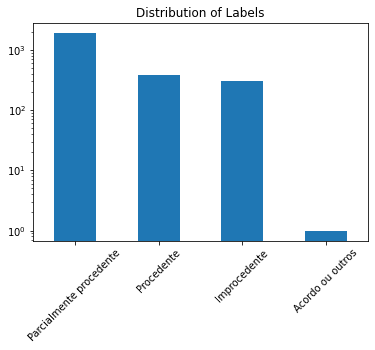

In [428]:
# Criar graficos de distribuição de classes
import matplotlib.pyplot as plt
%matplotlib inline

print(df['classificacao'].value_counts())
df['classificacao'].value_counts().plot.bar()
plt.yscale('log');
plt.title('Distribution of Labels')
plt.xticks(rotation=45)

In [411]:
# Analisando o tamanho (min., máx, méd. de tokens) dos campos do DF['dispositivo', 'relatorio', 'fundamentacao']
# Para cada linha (i) do DF:
#   Capturar os campos em variaveis de texto
#   Instanciar o SpaCy utilizando cada um dos campos 
#       P. ex.: docDisp = nlp(DF['dispositivo'][i])
#               docRelat = nlp(DF['relatorio'][i]) 
#               docFundam = nlp(DF['fundamentacao'][i])
#   Contar a quantidade de tokens que tem no Doc.
#   Armazenar essas quantidades numa lista_dispositivo(i), lista_relatorio(i) e lista_fundamentacao(i)
# Podemos usar o pipe do SpaCy ou mesmo o Tokenizador do LeNER_Br.





In [115]:
# 1. Para um arquivo especifico:
# Já podemos instanciar os modelos de NER, Pergunta e Resposta e Resumo (em portugues)
#   para extrair novas colunas (Fato/Assunto, Jurisprudencia/Lei)para o Analytics.
#   Como as seções das sentenças estão separadas em campos no dataset (relatorio, fundamentacao, dispositivo, etc)
#   ficara mais fácil inserir estas seções nos modelos de NLP/BERT. Podemos também usa-las no pipe do SpaCy e 
#   guardar numa coluna tempoária (ou lista) o quantitativo de tokens e depois calcular o max, min, média de tokens
#   em cada seção da sentença e se precisamos fazer padding ou não.
#
# Verificar os registros (processos/arquivos) que possuem algum campo vazio para aperfeiçoar a captura/BERT
#
# E a classificacao (procedencia)? Copiar o notebook que captura a classificacao do dispositivo. OK
#   Excluir do dataset os registros que nao foi possivel fazer a classificacao exata. OK
#   É possivel fazermos a classificacao/procedencia por pedido? Como reconhecer os pedidos? Se parcialmente 
#      procedente, pedido tal procedente, pedido tal improcedente, etc.
#
# 2. Já podemos criar um Dataset com as colunas capturadas neste arquivo (antes de rodar para todos os txts 
#  da pasta). OK
# Verificar os registros (processos/arquivos) que possuem algum campo vazio para aperfeiçoar a captura/regex